In [1]:
%env CONDA_PREFIX

'C:\\Users\\ai41\\anaconda3\\envs\\tensorflow'

In [2]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

In [3]:
import cv2   #opencv
import imutils

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [9]:
#IMG_DIR="d:/Ai/project1/imgs/train"
IMG_DIR="d:/Ai/project1/"
df = pd.read_csv(IMG_DIR+"driver_imgs_list.csv")
df['img'] = IMG_DIR + 'imgs/train/' + df['classname'] + '/' + df['img']
x = df["classname"]
y = df["img"]
df = df.sample(frac=1)
print(type(df))
print(type(x))
df.head(20)
df_train = df[:14000]
df_test = df[14000:]

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [10]:
df_test

,subject,classname,img
21776,p081,c1,d:/Ai/project1/imgs/train/c1/img_86495.jpg
21563,p075,c9,d:/Ai/project1/imgs/train/c9/img_6919.jpg
18933,p064,c4,d:/Ai/project1/imgs/train/c4/img_29399.jpg
13196,p047,c6,d:/Ai/project1/imgs/train/c6/img_98836.jpg
8787,p026,c5,d:/Ai/project1/imgs/train/c5/img_33019.jpg
...,...,...,...
13951,p049,c4,d:/Ai/project1/imgs/train/c4/img_82296.jpg
9117,p026,c8,d:/Ai/project1/imgs/train/c8/img_85996.jpg
2881,p015,c5,d:/Ai/project1/imgs/train/c5/img_51081.jpg
5545,p021,c9,d:/Ai/project1/imgs/train/c9/img_95935.jpg


In [11]:
df_test.head(25)

,subject,classname,img
21776,p081,c1,d:/Ai/project1/imgs/train/c1/img_86495.jpg
21563,p075,c9,d:/Ai/project1/imgs/train/c9/img_6919.jpg
18933,p064,c4,d:/Ai/project1/imgs/train/c4/img_29399.jpg
13196,p047,c6,d:/Ai/project1/imgs/train/c6/img_98836.jpg
8787,p026,c5,d:/Ai/project1/imgs/train/c5/img_33019.jpg
15379,p051,c0,d:/Ai/project1/imgs/train/c0/img_80596.jpg
11929,p042,c9,d:/Ai/project1/imgs/train/c9/img_9777.jpg
13793,p049,c2,d:/Ai/project1/imgs/train/c2/img_31763.jpg
16287,p052,c0,d:/Ai/project1/imgs/train/c0/img_48185.jpg
6355,p022,c5,d:/Ai/project1/imgs/train/c5/img_27101.jpg


In [12]:
df_train

,subject,classname,img
8890,p026,c6,d:/Ai/project1/imgs/train/c6/img_28431.jpg
18041,p061,c3,d:/Ai/project1/imgs/train/c3/img_6747.jpg
17243,p056,c3,d:/Ai/project1/imgs/train/c3/img_76438.jpg
7656,p024,c6,d:/Ai/project1/imgs/train/c6/img_1906.jpg
15237,p050,c8,d:/Ai/project1/imgs/train/c8/img_29002.jpg
...,...,...,...
18013,p061,c2,d:/Ai/project1/imgs/train/c2/img_12412.jpg
1973,p014,c4,d:/Ai/project1/imgs/train/c4/img_87370.jpg
5878,p022,c2,d:/Ai/project1/imgs/train/c2/img_3555.jpg
7969,p024,c9,d:/Ai/project1/imgs/train/c9/img_63146.jpg


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
datagen = ImageDataGenerator(rescale=1./255,                  #이미지 데이터 /255 : Minmaxscaling
                                      zoom_range=0.1,    #원래 영상에 +-20%(0.8~1.2) 정도 크기를 재조정해라
                                      width_shift_range=0.1, #좌우로 약간씩 이동한 영상으로 만들라(모든 사진이 정가운데x라서)
                                      height_shift_range=0.1,   #위아래로 약간씩(+-20%) 이동한 영상 
                                      validation_split=0.2   #rotation: 각도도 범위 지정 가능 #학습 data 80%, 테스트 데이터 20% 변형된 데이터가 나올 수 있게 해서 학습
                                     )   #데이터 증강 
train_data = datagen.flow_from_dataframe(df_train,
                                         x_col='img',
                                         y_col = 'classname',
                                        target_size=(123,155),  #타겟 사이즈
                                        batch_size=16,      #배치 사이즈 32장 추출
                                        class_mode = 'categorical',   #출력 노드가 one-hot encoding
                                       subset = 'training')   #트레이닝용 80%

valid_data = datagen.flow_from_dataframe(df_train,
                                         x_col='img',
                                         y_col = 'classname',
                                         target_size=(123,155),
                                     batch_size=16,
                                     class_mode = 'categorical',   #one-hot encoding
                                     subset = 'validation')   #validation용
#원핫 인코딩을 위해 클래스 수를 보니 5개더라

datagen = ImageDataGenerator(rescale=1./255,                  #이미지 데이터 /255 : Minmaxscaling
                                      zoom_range=0.1,    #원래 영상에 +-20%(0.8~1.2) 정도 크기를 재조정해라
                                      width_shift_range=0.1, #좌우로 약간씩 이동한 영상으로 만들라(모든 사진이 정가운데x라서)
                                      height_shift_range=0.1,   #위아래로 약간씩(+-20%) 이동한 영상 
#                                       validation_split=0.2   #rotation: 각도도 범위 지정 가능 #학습 data 80%, 테스트 데이터 20% 변형된 데이터가 나올 수 있게 해서 학습
                                     )   #데이터 증강 
test_data = datagen.flow_from_dataframe(df_test,
                                         x_col='img',
                                         y_col = 'classname',
                                        target_size=(123,155),  #타겟 사이즈
                                        batch_size=16,      #배치 사이즈 32장 추출
                                        class_mode = 'categorical',   #출력 노드가 one-hot encoding
                                       subset = 'training')   #트레이닝용 80%

Found 11200 validated image filenames belonging to 10 classes.
Found 2800 validated image filenames belonging to 10 classes.
Found 8424 validated image filenames belonging to 10 classes.


In [5]:
IMG_DIR="d:/Ai/project1/imgs/train/"

In [15]:
seed=0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
#conv1
model.add(Conv2D(32, (5, 5), 2, input_shape=(123,155,3),      
                activation="relu"))
#maxpooling 1
model.add(MaxPooling2D(pool_size=(2,2)))
#conv2
model.add(Conv2D(64, (3,3), activation="relu"))
#maxp 2
model.add(MaxPooling2D(pool_size=(2,2)))  #conv1>mp1>conv2>mp2>flatten해서>fc1>fc2
model.add(Dropout(0.25))   
#탈락율이 25% : 다 하면 너무 학습 패턴에 맞추어진다. (과적합방지)
#어떤 뉴런은 탈락시킨다 = 이 뉴런은 수정안하고 나머지 75%는 수정, 선택되는 뉴런은 할때마다 달라진다

model.add(Conv2D(128,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))   

model.add(Flatten())
model.add(Dense(units=30, activation="relu")) #은닉층 1 :relu,입력 17개, 뉴런 30개 
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy",  #spares는 one-hot coding 안할때
             optimizer="adam",
             metrics=["accuracy"])
#모델 저장 폴더 설정
MODEL_DIR = "d:/Ai/project1/"
if not os.path.exists (MODEL_DIR):
    os.mkdir(MODEL_DIR)                          #().mkdir :폴더 생성
                                                                    
#모델 저장 조건 설정            #파일이름에는 빈칸이 들어가면 안된다
modelfile = MODEL_DIR+'CNN_project1_best.h5'   
checkpointer = ModelCheckpoint(filepath=modelfile,      
                              moniter="val_loss", verbose=1,
                              save_best_only=True) 

#학습의 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=20)


#모델 학습 및 저장  
fit_history = model.fit(train_data, 
                        epochs=200, verbose=1, 
                        validation_data=valid_data,
                        callbacks=[early_stopping_callback, checkpointer])

Epoch 1/200
700/700 [==============================] - ETA: 0s - loss: 2.0815 - accuracy: 0.1837
Epoch 00001: val_loss improved from inf to 1.73403, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 101s 144ms/step - loss: 2.0815 - accuracy: 0.1837 - val_loss: 1.7340 - val_accuracy: 0.3214
Epoch 2/200
700/700 [==============================] - ETA: 0s - loss: 1.5518 - accuracy: 0.3849
Epoch 00002: val_loss improved from 1.73403 to 1.38464, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 103s 147ms/step - loss: 1.5518 - accuracy: 0.3849 - val_loss: 1.3846 - val_accuracy: 0.4189
Epoch 3/200
700/700 [==============================] - ETA: 0s - loss: 1.3018 - accuracy: 0.4848
Epoch 00003: val_loss improved from 1.38464 to 1.18456, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 101s 144ms/step - loss: 1.3018 - accuracy: 0.4848 - val_loss: 1.1846 - val_a

Epoch 26/200
700/700 [==============================] - ETA: 0s - loss: 0.1959 - accuracy: 0.9361
Epoch 00026: val_loss improved from 0.11265 to 0.11106, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 99s 141ms/step - loss: 0.1959 - accuracy: 0.9361 - val_loss: 0.1111 - val_accuracy: 0.9707
Epoch 27/200
700/700 [==============================] - ETA: 0s - loss: 0.1852 - accuracy: 0.9403
Epoch 00027: val_loss did not improve from 0.11106
700/700 [==============================] - 97s 139ms/step - loss: 0.1852 - accuracy: 0.9403 - val_loss: 0.1355 - val_accuracy: 0.9629
Epoch 28/200
700/700 [==============================] - ETA: 0s - loss: 0.1599 - accuracy: 0.9496
Epoch 00028: val_loss improved from 0.11106 to 0.10801, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 98s 140ms/step - loss: 0.1599 - accuracy: 0.9496 - val_loss: 0.1080 - val_accuracy: 0.9711
Epoch 29/200
700/700 [===============

Epoch 54/200
700/700 [==============================] - ETA: 0s - loss: 0.1183 - accuracy: 0.9629
Epoch 00054: val_loss did not improve from 0.06224
700/700 [==============================] - 100s 143ms/step - loss: 0.1183 - accuracy: 0.9629 - val_loss: 0.0629 - val_accuracy: 0.9829
Epoch 55/200
700/700 [==============================] - ETA: 0s - loss: 0.1180 - accuracy: 0.9629
Epoch 00055: val_loss did not improve from 0.06224
700/700 [==============================] - 97s 138ms/step - loss: 0.1180 - accuracy: 0.9629 - val_loss: 0.0638 - val_accuracy: 0.9825
Epoch 56/200
700/700 [==============================] - ETA: 0s - loss: 0.1113 - accuracy: 0.9653
Epoch 00056: val_loss improved from 0.06224 to 0.05831, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 100s 143ms/step - loss: 0.1113 - accuracy: 0.9653 - val_loss: 0.0583 - val_accuracy: 0.9839
Epoch 57/200
700/700 [==============================] - ETA: 0s - loss: 0.1052 - accuracy: 0

Epoch 111/200
700/700 [==============================] - ETA: 0s - loss: 0.0753 - accuracy: 0.9767
Epoch 00111: val_loss improved from 0.03569 to 0.03059, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 97s 139ms/step - loss: 0.0753 - accuracy: 0.9767 - val_loss: 0.0306 - val_accuracy: 0.9907
Epoch 112/200
700/700 [==============================] - ETA: 0s - loss: 0.0759 - accuracy: 0.9758
Epoch 00112: val_loss did not improve from 0.03059
700/700 [==============================] - 97s 139ms/step - loss: 0.0759 - accuracy: 0.9758 - val_loss: 0.0429 - val_accuracy: 0.9882
Epoch 113/200
700/700 [==============================] - ETA: 0s - loss: 0.0751 - accuracy: 0.9766
Epoch 00113: val_loss did not improve from 0.03059
700/700 [==============================] - 97s 139ms/step - loss: 0.0751 - accuracy: 0.9766 - val_loss: 0.0455 - val_accuracy: 0.9879
Epoch 114/200
700/700 [==============================] - ETA: 0s - loss: 0.0661 - accuracy:

In [17]:
fit_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
def display_training_curves(training, validation, title, subplot):    
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.grid()
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

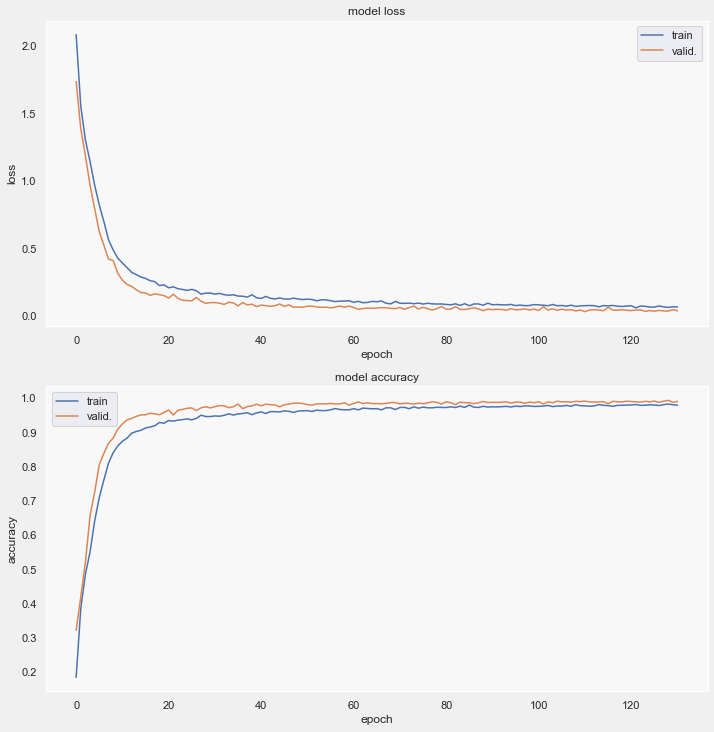

In [19]:
display_training_curves(
    fit_history.history['loss'], 
    fit_history.history['val_loss'], 
    'loss', 211)
display_training_curves(
    fit_history.history['accuracy'], 
    fit_history.history['val_accuracy'], 
    'accuracy', 212)

In [21]:
from tensorflow.keras.models import load_model
MODEL_DIR = "d:/Ai/project1/"
modelfile = MODEL_DIR+'CNN_project1_best.h5'
model = load_model(modelfile)

In [59]:
from tensorflow.keras.models import load_model
MODEL_DIR = "d:/Ai/project1/"
modelfile = MODEL_DIR+'CNN_project1_best.h5'
model = load_model(modelfile)

In [60]:
test_data

In [46]:
max_val_list=[]
y_pred_list=[]

for idx, fname in enumerate(df_test['img'] ):
    path=fname
    print(idx, ":", path, end ="==>")
    #print(path)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   
    image = cv2.resize(image, (155, 123))
    image = image / 255.
    pred = model.predict(np.array([image]))
    max_val = np.max(pred[0])
    y_pred = np.argmax(pred[0]) 
    max_val_list.append(max_val)
    y_pred_list.append(y_pred)
    print(y_pred, "[",  int(df_test.iloc[idx, 1][-1]),"]", '%.2f' %max_val)
else :
    print(len(max_val_list), len(y_pred_list))

0 : d:/Ai/project1/imgs/train/c1/img_86495.jpg==>1 [ 1 ] 1.00
1 : d:/Ai/project1/imgs/train/c9/img_6919.jpg==>9 [ 9 ] 1.00
2 : d:/Ai/project1/imgs/train/c4/img_29399.jpg==>4 [ 4 ] 1.00
3 : d:/Ai/project1/imgs/train/c6/img_98836.jpg==>6 [ 6 ] 1.00
4 : d:/Ai/project1/imgs/train/c5/img_33019.jpg==>5 [ 5 ] 1.00
5 : d:/Ai/project1/imgs/train/c0/img_80596.jpg==>0 [ 0 ] 1.00
6 : d:/Ai/project1/imgs/train/c9/img_9777.jpg==>9 [ 9 ] 1.00
7 : d:/Ai/project1/imgs/train/c2/img_31763.jpg==>2 [ 2 ] 1.00
8 : d:/Ai/project1/imgs/train/c0/img_48185.jpg==>0 [ 0 ] 1.00
9 : d:/Ai/project1/imgs/train/c5/img_27101.jpg==>5 [ 5 ] 1.00
10 : d:/Ai/project1/imgs/train/c0/img_2113.jpg==>0 [ 0 ] 1.00
11 : d:/Ai/project1/imgs/train/c2/img_76136.jpg==>2 [ 2 ] 1.00
12 : d:/Ai/project1/imgs/train/c3/img_76568.jpg==>3 [ 3 ] 1.00
13 : d:/Ai/project1/imgs/train/c7/img_16947.jpg==>7 [ 7 ] 1.00
14 : d:/Ai/project1/imgs/train/c4/img_44129.jpg==>4 [ 4 ] 1.00
15 : d:/Ai/project1/imgs/train/c2/img_27958.jpg==>2 [ 2 ] 1.00
16 : 

133 : d:/Ai/project1/imgs/train/c2/img_97629.jpg==>2 [ 2 ] 1.00
134 : d:/Ai/project1/imgs/train/c1/img_14420.jpg==>1 [ 1 ] 1.00
135 : d:/Ai/project1/imgs/train/c9/img_83838.jpg==>9 [ 9 ] 1.00
136 : d:/Ai/project1/imgs/train/c1/img_75368.jpg==>1 [ 1 ] 1.00
137 : d:/Ai/project1/imgs/train/c1/img_82299.jpg==>1 [ 1 ] 1.00
138 : d:/Ai/project1/imgs/train/c9/img_61578.jpg==>9 [ 9 ] 1.00
139 : d:/Ai/project1/imgs/train/c5/img_66835.jpg==>5 [ 5 ] 1.00
140 : d:/Ai/project1/imgs/train/c5/img_52091.jpg==>5 [ 5 ] 1.00
141 : d:/Ai/project1/imgs/train/c6/img_81473.jpg==>6 [ 6 ] 1.00
142 : d:/Ai/project1/imgs/train/c8/img_60591.jpg==>8 [ 8 ] 0.97
143 : d:/Ai/project1/imgs/train/c3/img_89345.jpg==>3 [ 3 ] 1.00
144 : d:/Ai/project1/imgs/train/c5/img_3360.jpg==>5 [ 5 ] 1.00
145 : d:/Ai/project1/imgs/train/c4/img_33752.jpg==>4 [ 4 ] 0.99
146 : d:/Ai/project1/imgs/train/c2/img_75691.jpg==>2 [ 2 ] 1.00
147 : d:/Ai/project1/imgs/train/c5/img_74027.jpg==>5 [ 5 ] 1.00
148 : d:/Ai/project1/imgs/train/c6/img_80

265 : d:/Ai/project1/imgs/train/c1/img_33045.jpg==>1 [ 1 ] 0.98
266 : d:/Ai/project1/imgs/train/c5/img_61584.jpg==>5 [ 5 ] 1.00
267 : d:/Ai/project1/imgs/train/c2/img_66429.jpg==>2 [ 2 ] 1.00
268 : d:/Ai/project1/imgs/train/c9/img_71065.jpg==>9 [ 9 ] 1.00
269 : d:/Ai/project1/imgs/train/c3/img_6811.jpg==>3 [ 3 ] 1.00
270 : d:/Ai/project1/imgs/train/c5/img_42330.jpg==>5 [ 5 ] 1.00
271 : d:/Ai/project1/imgs/train/c2/img_12104.jpg==>2 [ 2 ] 1.00
272 : d:/Ai/project1/imgs/train/c2/img_17046.jpg==>2 [ 2 ] 1.00
273 : d:/Ai/project1/imgs/train/c9/img_24934.jpg==>9 [ 9 ] 1.00
274 : d:/Ai/project1/imgs/train/c2/img_30524.jpg==>2 [ 2 ] 1.00
275 : d:/Ai/project1/imgs/train/c2/img_67592.jpg==>2 [ 2 ] 1.00
276 : d:/Ai/project1/imgs/train/c9/img_63600.jpg==>9 [ 9 ] 0.96
277 : d:/Ai/project1/imgs/train/c3/img_30528.jpg==>3 [ 3 ] 1.00
278 : d:/Ai/project1/imgs/train/c0/img_31778.jpg==>0 [ 0 ] 1.00
279 : d:/Ai/project1/imgs/train/c5/img_69565.jpg==>5 [ 5 ] 1.00
280 : d:/Ai/project1/imgs/train/c6/img_67

399 : d:/Ai/project1/imgs/train/c9/img_36647.jpg==>9 [ 9 ] 1.00
400 : d:/Ai/project1/imgs/train/c8/img_59098.jpg==>8 [ 8 ] 0.96
401 : d:/Ai/project1/imgs/train/c8/img_88803.jpg==>8 [ 8 ] 0.96
402 : d:/Ai/project1/imgs/train/c2/img_49672.jpg==>2 [ 2 ] 1.00
403 : d:/Ai/project1/imgs/train/c0/img_38766.jpg==>0 [ 0 ] 0.96
404 : d:/Ai/project1/imgs/train/c6/img_76008.jpg==>6 [ 6 ] 1.00
405 : d:/Ai/project1/imgs/train/c1/img_60221.jpg==>1 [ 1 ] 1.00
406 : d:/Ai/project1/imgs/train/c7/img_101110.jpg==>7 [ 7 ] 1.00
407 : d:/Ai/project1/imgs/train/c4/img_36318.jpg==>4 [ 4 ] 1.00
408 : d:/Ai/project1/imgs/train/c5/img_46321.jpg==>5 [ 5 ] 1.00
409 : d:/Ai/project1/imgs/train/c9/img_95184.jpg==>9 [ 9 ] 1.00
410 : d:/Ai/project1/imgs/train/c0/img_86692.jpg==>0 [ 0 ] 1.00
411 : d:/Ai/project1/imgs/train/c3/img_58768.jpg==>3 [ 3 ] 1.00
412 : d:/Ai/project1/imgs/train/c2/img_16936.jpg==>2 [ 2 ] 1.00
413 : d:/Ai/project1/imgs/train/c9/img_74922.jpg==>9 [ 9 ] 1.00
414 : d:/Ai/project1/imgs/train/c9/img_

531 : d:/Ai/project1/imgs/train/c4/img_41044.jpg==>4 [ 4 ] 1.00
532 : d:/Ai/project1/imgs/train/c8/img_20347.jpg==>8 [ 8 ] 1.00
533 : d:/Ai/project1/imgs/train/c8/img_67361.jpg==>8 [ 8 ] 0.96
534 : d:/Ai/project1/imgs/train/c3/img_7253.jpg==>3 [ 3 ] 1.00
535 : d:/Ai/project1/imgs/train/c9/img_99761.jpg==>9 [ 9 ] 1.00
536 : d:/Ai/project1/imgs/train/c3/img_74418.jpg==>3 [ 3 ] 1.00
537 : d:/Ai/project1/imgs/train/c1/img_19773.jpg==>1 [ 1 ] 1.00
538 : d:/Ai/project1/imgs/train/c3/img_33239.jpg==>3 [ 3 ] 1.00
539 : d:/Ai/project1/imgs/train/c6/img_93480.jpg==>6 [ 6 ] 1.00
540 : d:/Ai/project1/imgs/train/c0/img_49228.jpg==>0 [ 0 ] 0.84
541 : d:/Ai/project1/imgs/train/c2/img_57149.jpg==>2 [ 2 ] 1.00
542 : d:/Ai/project1/imgs/train/c4/img_94964.jpg==>4 [ 4 ] 1.00
543 : d:/Ai/project1/imgs/train/c9/img_93171.jpg==>9 [ 9 ] 1.00
544 : d:/Ai/project1/imgs/train/c5/img_39754.jpg==>5 [ 5 ] 1.00
545 : d:/Ai/project1/imgs/train/c7/img_74348.jpg==>7 [ 7 ] 1.00
546 : d:/Ai/project1/imgs/train/c3/img_87

665 : d:/Ai/project1/imgs/train/c1/img_82331.jpg==>1 [ 1 ] 1.00
666 : d:/Ai/project1/imgs/train/c6/img_90555.jpg==>6 [ 6 ] 1.00
667 : d:/Ai/project1/imgs/train/c9/img_67477.jpg==>0 [ 9 ] 0.55
668 : d:/Ai/project1/imgs/train/c7/img_54901.jpg==>7 [ 7 ] 1.00
669 : d:/Ai/project1/imgs/train/c6/img_10647.jpg==>6 [ 6 ] 1.00
670 : d:/Ai/project1/imgs/train/c0/img_57373.jpg==>0 [ 0 ] 1.00
671 : d:/Ai/project1/imgs/train/c7/img_19802.jpg==>7 [ 7 ] 1.00
672 : d:/Ai/project1/imgs/train/c3/img_15157.jpg==>3 [ 3 ] 1.00
673 : d:/Ai/project1/imgs/train/c1/img_30434.jpg==>1 [ 1 ] 1.00
674 : d:/Ai/project1/imgs/train/c7/img_652.jpg==>7 [ 7 ] 1.00
675 : d:/Ai/project1/imgs/train/c9/img_71824.jpg==>9 [ 9 ] 0.91
676 : d:/Ai/project1/imgs/train/c4/img_4086.jpg==>4 [ 4 ] 0.99
677 : d:/Ai/project1/imgs/train/c4/img_51696.jpg==>4 [ 4 ] 1.00
678 : d:/Ai/project1/imgs/train/c5/img_55047.jpg==>5 [ 5 ] 1.00
679 : d:/Ai/project1/imgs/train/c6/img_77311.jpg==>6 [ 6 ] 1.00
680 : d:/Ai/project1/imgs/train/c8/img_2596

793 : d:/Ai/project1/imgs/train/c1/img_47196.jpg==>1 [ 1 ] 1.00
794 : d:/Ai/project1/imgs/train/c0/img_61373.jpg==>0 [ 0 ] 1.00
795 : d:/Ai/project1/imgs/train/c4/img_72446.jpg==>4 [ 4 ] 1.00
796 : d:/Ai/project1/imgs/train/c4/img_87040.jpg==>4 [ 4 ] 1.00
797 : d:/Ai/project1/imgs/train/c5/img_42939.jpg==>5 [ 5 ] 1.00
798 : d:/Ai/project1/imgs/train/c7/img_30189.jpg==>7 [ 7 ] 1.00
799 : d:/Ai/project1/imgs/train/c7/img_71276.jpg==>7 [ 7 ] 1.00
800 : d:/Ai/project1/imgs/train/c0/img_23592.jpg==>0 [ 0 ] 1.00
801 : d:/Ai/project1/imgs/train/c8/img_49772.jpg==>8 [ 8 ] 0.99
802 : d:/Ai/project1/imgs/train/c6/img_52178.jpg==>6 [ 6 ] 1.00
803 : d:/Ai/project1/imgs/train/c3/img_2036.jpg==>3 [ 3 ] 1.00
804 : d:/Ai/project1/imgs/train/c5/img_29446.jpg==>5 [ 5 ] 1.00
805 : d:/Ai/project1/imgs/train/c5/img_40790.jpg==>5 [ 5 ] 1.00
806 : d:/Ai/project1/imgs/train/c1/img_84330.jpg==>1 [ 1 ] 1.00
807 : d:/Ai/project1/imgs/train/c1/img_24509.jpg==>1 [ 1 ] 1.00
808 : d:/Ai/project1/imgs/train/c0/img_26

924 : d:/Ai/project1/imgs/train/c4/img_51547.jpg==>4 [ 4 ] 1.00
925 : d:/Ai/project1/imgs/train/c2/img_77260.jpg==>2 [ 2 ] 1.00
926 : d:/Ai/project1/imgs/train/c1/img_872.jpg==>1 [ 1 ] 1.00
927 : d:/Ai/project1/imgs/train/c6/img_70466.jpg==>6 [ 6 ] 1.00
928 : d:/Ai/project1/imgs/train/c8/img_19530.jpg==>8 [ 8 ] 1.00
929 : d:/Ai/project1/imgs/train/c0/img_91479.jpg==>0 [ 0 ] 1.00
930 : d:/Ai/project1/imgs/train/c4/img_13940.jpg==>4 [ 4 ] 0.99
931 : d:/Ai/project1/imgs/train/c6/img_4090.jpg==>6 [ 6 ] 1.00
932 : d:/Ai/project1/imgs/train/c8/img_92543.jpg==>8 [ 8 ] 1.00
933 : d:/Ai/project1/imgs/train/c7/img_36303.jpg==>7 [ 7 ] 1.00
934 : d:/Ai/project1/imgs/train/c6/img_25308.jpg==>6 [ 6 ] 1.00
935 : d:/Ai/project1/imgs/train/c9/img_86576.jpg==>9 [ 9 ] 1.00
936 : d:/Ai/project1/imgs/train/c8/img_81916.jpg==>8 [ 8 ] 1.00
937 : d:/Ai/project1/imgs/train/c3/img_68699.jpg==>3 [ 3 ] 1.00
938 : d:/Ai/project1/imgs/train/c0/img_70611.jpg==>0 [ 0 ] 1.00
939 : d:/Ai/project1/imgs/train/c4/img_5766

1055 : d:/Ai/project1/imgs/train/c6/img_39861.jpg==>6 [ 6 ] 1.00
1056 : d:/Ai/project1/imgs/train/c2/img_70906.jpg==>2 [ 2 ] 1.00
1057 : d:/Ai/project1/imgs/train/c4/img_80502.jpg==>4 [ 4 ] 1.00
1058 : d:/Ai/project1/imgs/train/c0/img_40990.jpg==>0 [ 0 ] 1.00
1059 : d:/Ai/project1/imgs/train/c7/img_96598.jpg==>7 [ 7 ] 1.00
1060 : d:/Ai/project1/imgs/train/c2/img_42027.jpg==>2 [ 2 ] 1.00
1061 : d:/Ai/project1/imgs/train/c6/img_94319.jpg==>6 [ 6 ] 1.00
1062 : d:/Ai/project1/imgs/train/c5/img_85240.jpg==>5 [ 5 ] 1.00
1063 : d:/Ai/project1/imgs/train/c0/img_54868.jpg==>0 [ 0 ] 1.00
1064 : d:/Ai/project1/imgs/train/c1/img_41262.jpg==>1 [ 1 ] 1.00
1065 : d:/Ai/project1/imgs/train/c2/img_20857.jpg==>2 [ 2 ] 1.00
1066 : d:/Ai/project1/imgs/train/c0/img_59237.jpg==>0 [ 0 ] 0.99
1067 : d:/Ai/project1/imgs/train/c1/img_24831.jpg==>1 [ 1 ] 1.00
1068 : d:/Ai/project1/imgs/train/c6/img_6089.jpg==>6 [ 6 ] 1.00
1069 : d:/Ai/project1/imgs/train/c7/img_31252.jpg==>7 [ 7 ] 1.00
1070 : d:/Ai/project1/imgs

1181 : d:/Ai/project1/imgs/train/c9/img_53664.jpg==>9 [ 9 ] 1.00
1182 : d:/Ai/project1/imgs/train/c1/img_2388.jpg==>1 [ 1 ] 1.00
1183 : d:/Ai/project1/imgs/train/c4/img_58436.jpg==>4 [ 4 ] 0.97
1184 : d:/Ai/project1/imgs/train/c0/img_46060.jpg==>0 [ 0 ] 1.00
1185 : d:/Ai/project1/imgs/train/c5/img_34400.jpg==>5 [ 5 ] 1.00
1186 : d:/Ai/project1/imgs/train/c9/img_73607.jpg==>9 [ 9 ] 0.99
1187 : d:/Ai/project1/imgs/train/c9/img_4141.jpg==>9 [ 9 ] 1.00
1188 : d:/Ai/project1/imgs/train/c0/img_43734.jpg==>0 [ 0 ] 1.00
1189 : d:/Ai/project1/imgs/train/c7/img_91196.jpg==>7 [ 7 ] 1.00
1190 : d:/Ai/project1/imgs/train/c5/img_50683.jpg==>5 [ 5 ] 1.00
1191 : d:/Ai/project1/imgs/train/c6/img_13740.jpg==>6 [ 6 ] 1.00
1192 : d:/Ai/project1/imgs/train/c2/img_43297.jpg==>2 [ 2 ] 1.00
1193 : d:/Ai/project1/imgs/train/c7/img_63291.jpg==>7 [ 7 ] 1.00
1194 : d:/Ai/project1/imgs/train/c7/img_86568.jpg==>7 [ 7 ] 1.00
1195 : d:/Ai/project1/imgs/train/c4/img_61548.jpg==>4 [ 4 ] 1.00
1196 : d:/Ai/project1/imgs/

1312 : d:/Ai/project1/imgs/train/c2/img_19501.jpg==>2 [ 2 ] 1.00
1313 : d:/Ai/project1/imgs/train/c3/img_41900.jpg==>3 [ 3 ] 1.00
1314 : d:/Ai/project1/imgs/train/c0/img_31613.jpg==>0 [ 0 ] 1.00
1315 : d:/Ai/project1/imgs/train/c9/img_76401.jpg==>9 [ 9 ] 1.00
1316 : d:/Ai/project1/imgs/train/c5/img_100695.jpg==>5 [ 5 ] 1.00
1317 : d:/Ai/project1/imgs/train/c2/img_25921.jpg==>2 [ 2 ] 1.00
1318 : d:/Ai/project1/imgs/train/c4/img_57083.jpg==>4 [ 4 ] 1.00
1319 : d:/Ai/project1/imgs/train/c7/img_83613.jpg==>7 [ 7 ] 1.00
1320 : d:/Ai/project1/imgs/train/c3/img_28292.jpg==>3 [ 3 ] 1.00
1321 : d:/Ai/project1/imgs/train/c6/img_41103.jpg==>6 [ 6 ] 1.00
1322 : d:/Ai/project1/imgs/train/c2/img_29483.jpg==>2 [ 2 ] 1.00
1323 : d:/Ai/project1/imgs/train/c9/img_69533.jpg==>9 [ 9 ] 1.00
1324 : d:/Ai/project1/imgs/train/c5/img_87216.jpg==>5 [ 5 ] 1.00
1325 : d:/Ai/project1/imgs/train/c2/img_90299.jpg==>2 [ 2 ] 1.00
1326 : d:/Ai/project1/imgs/train/c1/img_94577.jpg==>1 [ 1 ] 0.99
1327 : d:/Ai/project1/im

1443 : d:/Ai/project1/imgs/train/c8/img_33479.jpg==>8 [ 8 ] 1.00
1444 : d:/Ai/project1/imgs/train/c9/img_85062.jpg==>9 [ 9 ] 1.00
1445 : d:/Ai/project1/imgs/train/c8/img_13505.jpg==>8 [ 8 ] 1.00
1446 : d:/Ai/project1/imgs/train/c4/img_72477.jpg==>4 [ 4 ] 1.00
1447 : d:/Ai/project1/imgs/train/c9/img_769.jpg==>9 [ 9 ] 1.00
1448 : d:/Ai/project1/imgs/train/c2/img_69543.jpg==>2 [ 2 ] 1.00
1449 : d:/Ai/project1/imgs/train/c7/img_30145.jpg==>7 [ 7 ] 1.00
1450 : d:/Ai/project1/imgs/train/c7/img_74753.jpg==>7 [ 7 ] 1.00
1451 : d:/Ai/project1/imgs/train/c8/img_44858.jpg==>8 [ 8 ] 1.00
1452 : d:/Ai/project1/imgs/train/c4/img_62461.jpg==>4 [ 4 ] 1.00
1453 : d:/Ai/project1/imgs/train/c4/img_37291.jpg==>4 [ 4 ] 1.00
1454 : d:/Ai/project1/imgs/train/c0/img_29332.jpg==>0 [ 0 ] 1.00
1455 : d:/Ai/project1/imgs/train/c0/img_70032.jpg==>0 [ 0 ] 1.00
1456 : d:/Ai/project1/imgs/train/c8/img_82672.jpg==>8 [ 8 ] 1.00
1457 : d:/Ai/project1/imgs/train/c1/img_12544.jpg==>1 [ 1 ] 1.00
1458 : d:/Ai/project1/imgs/

1572 : d:/Ai/project1/imgs/train/c3/img_53391.jpg==>3 [ 3 ] 1.00
1573 : d:/Ai/project1/imgs/train/c2/img_31875.jpg==>2 [ 2 ] 1.00
1574 : d:/Ai/project1/imgs/train/c8/img_8605.jpg==>8 [ 8 ] 0.97
1575 : d:/Ai/project1/imgs/train/c0/img_37413.jpg==>0 [ 0 ] 1.00
1576 : d:/Ai/project1/imgs/train/c2/img_100897.jpg==>2 [ 2 ] 1.00
1577 : d:/Ai/project1/imgs/train/c6/img_61461.jpg==>6 [ 6 ] 0.99
1578 : d:/Ai/project1/imgs/train/c8/img_32789.jpg==>8 [ 8 ] 1.00
1579 : d:/Ai/project1/imgs/train/c5/img_12126.jpg==>5 [ 5 ] 1.00
1580 : d:/Ai/project1/imgs/train/c5/img_9637.jpg==>5 [ 5 ] 1.00
1581 : d:/Ai/project1/imgs/train/c4/img_41188.jpg==>4 [ 4 ] 1.00
1582 : d:/Ai/project1/imgs/train/c2/img_25728.jpg==>2 [ 2 ] 1.00
1583 : d:/Ai/project1/imgs/train/c9/img_53058.jpg==>9 [ 9 ] 1.00
1584 : d:/Ai/project1/imgs/train/c6/img_10777.jpg==>6 [ 6 ] 1.00
1585 : d:/Ai/project1/imgs/train/c8/img_68491.jpg==>8 [ 8 ] 1.00
1586 : d:/Ai/project1/imgs/train/c4/img_30264.jpg==>4 [ 4 ] 1.00
1587 : d:/Ai/project1/imgs

1700 : d:/Ai/project1/imgs/train/c1/img_57226.jpg==>1 [ 1 ] 1.00
1701 : d:/Ai/project1/imgs/train/c0/img_86606.jpg==>0 [ 0 ] 1.00
1702 : d:/Ai/project1/imgs/train/c1/img_9122.jpg==>1 [ 1 ] 1.00
1703 : d:/Ai/project1/imgs/train/c0/img_39565.jpg==>0 [ 0 ] 1.00
1704 : d:/Ai/project1/imgs/train/c4/img_27644.jpg==>4 [ 4 ] 1.00
1705 : d:/Ai/project1/imgs/train/c4/img_6313.jpg==>4 [ 4 ] 1.00
1706 : d:/Ai/project1/imgs/train/c1/img_66825.jpg==>1 [ 1 ] 1.00
1707 : d:/Ai/project1/imgs/train/c9/img_75655.jpg==>9 [ 9 ] 1.00
1708 : d:/Ai/project1/imgs/train/c3/img_57294.jpg==>3 [ 3 ] 1.00
1709 : d:/Ai/project1/imgs/train/c7/img_49234.jpg==>7 [ 7 ] 1.00
1710 : d:/Ai/project1/imgs/train/c5/img_99307.jpg==>5 [ 5 ] 1.00
1711 : d:/Ai/project1/imgs/train/c3/img_80493.jpg==>3 [ 3 ] 1.00
1712 : d:/Ai/project1/imgs/train/c6/img_24304.jpg==>6 [ 6 ] 1.00
1713 : d:/Ai/project1/imgs/train/c3/img_70360.jpg==>3 [ 3 ] 1.00
1714 : d:/Ai/project1/imgs/train/c3/img_55817.jpg==>3 [ 3 ] 1.00
1715 : d:/Ai/project1/imgs/

1830 : d:/Ai/project1/imgs/train/c1/img_12519.jpg==>1 [ 1 ] 1.00
1831 : d:/Ai/project1/imgs/train/c6/img_88383.jpg==>6 [ 6 ] 1.00
1832 : d:/Ai/project1/imgs/train/c5/img_27739.jpg==>5 [ 5 ] 1.00
1833 : d:/Ai/project1/imgs/train/c3/img_82374.jpg==>3 [ 3 ] 1.00
1834 : d:/Ai/project1/imgs/train/c9/img_59743.jpg==>9 [ 9 ] 0.99
1835 : d:/Ai/project1/imgs/train/c0/img_97574.jpg==>0 [ 0 ] 1.00
1836 : d:/Ai/project1/imgs/train/c4/img_59087.jpg==>4 [ 4 ] 1.00
1837 : d:/Ai/project1/imgs/train/c3/img_90965.jpg==>3 [ 3 ] 1.00
1838 : d:/Ai/project1/imgs/train/c7/img_85227.jpg==>7 [ 7 ] 1.00
1839 : d:/Ai/project1/imgs/train/c2/img_32491.jpg==>2 [ 2 ] 1.00
1840 : d:/Ai/project1/imgs/train/c5/img_81302.jpg==>5 [ 5 ] 1.00
1841 : d:/Ai/project1/imgs/train/c9/img_81543.jpg==>9 [ 9 ] 1.00
1842 : d:/Ai/project1/imgs/train/c0/img_60928.jpg==>0 [ 0 ] 1.00
1843 : d:/Ai/project1/imgs/train/c4/img_73878.jpg==>4 [ 4 ] 1.00
1844 : d:/Ai/project1/imgs/train/c3/img_8919.jpg==>3 [ 3 ] 0.86
1845 : d:/Ai/project1/imgs

1957 : d:/Ai/project1/imgs/train/c8/img_12354.jpg==>8 [ 8 ] 1.00
1958 : d:/Ai/project1/imgs/train/c1/img_53536.jpg==>1 [ 1 ] 1.00
1959 : d:/Ai/project1/imgs/train/c4/img_21449.jpg==>4 [ 4 ] 1.00
1960 : d:/Ai/project1/imgs/train/c3/img_39553.jpg==>3 [ 3 ] 1.00
1961 : d:/Ai/project1/imgs/train/c9/img_58732.jpg==>9 [ 9 ] 1.00
1962 : d:/Ai/project1/imgs/train/c8/img_44267.jpg==>8 [ 8 ] 1.00
1963 : d:/Ai/project1/imgs/train/c8/img_97050.jpg==>8 [ 8 ] 1.00
1964 : d:/Ai/project1/imgs/train/c1/img_76898.jpg==>1 [ 1 ] 1.00
1965 : d:/Ai/project1/imgs/train/c9/img_53350.jpg==>9 [ 9 ] 1.00
1966 : d:/Ai/project1/imgs/train/c0/img_13820.jpg==>0 [ 0 ] 1.00
1967 : d:/Ai/project1/imgs/train/c8/img_46359.jpg==>8 [ 8 ] 1.00
1968 : d:/Ai/project1/imgs/train/c9/img_8026.jpg==>9 [ 9 ] 0.98
1969 : d:/Ai/project1/imgs/train/c3/img_48101.jpg==>3 [ 3 ] 1.00
1970 : d:/Ai/project1/imgs/train/c0/img_82948.jpg==>0 [ 0 ] 1.00
1971 : d:/Ai/project1/imgs/train/c7/img_4921.jpg==>7 [ 7 ] 1.00
1972 : d:/Ai/project1/imgs/

2084 : d:/Ai/project1/imgs/train/c9/img_86164.jpg==>9 [ 9 ] 1.00
2085 : d:/Ai/project1/imgs/train/c4/img_99811.jpg==>4 [ 4 ] 1.00
2086 : d:/Ai/project1/imgs/train/c3/img_63787.jpg==>3 [ 3 ] 1.00
2087 : d:/Ai/project1/imgs/train/c1/img_27426.jpg==>1 [ 1 ] 1.00
2088 : d:/Ai/project1/imgs/train/c4/img_74652.jpg==>4 [ 4 ] 1.00
2089 : d:/Ai/project1/imgs/train/c1/img_52480.jpg==>1 [ 1 ] 1.00
2090 : d:/Ai/project1/imgs/train/c2/img_30291.jpg==>2 [ 2 ] 1.00
2091 : d:/Ai/project1/imgs/train/c3/img_6196.jpg==>3 [ 3 ] 1.00
2092 : d:/Ai/project1/imgs/train/c2/img_42430.jpg==>2 [ 2 ] 1.00
2093 : d:/Ai/project1/imgs/train/c5/img_42997.jpg==>5 [ 5 ] 1.00
2094 : d:/Ai/project1/imgs/train/c5/img_52065.jpg==>5 [ 5 ] 1.00
2095 : d:/Ai/project1/imgs/train/c3/img_58834.jpg==>3 [ 3 ] 1.00
2096 : d:/Ai/project1/imgs/train/c9/img_57500.jpg==>9 [ 9 ] 1.00
2097 : d:/Ai/project1/imgs/train/c0/img_76552.jpg==>0 [ 0 ] 0.99
2098 : d:/Ai/project1/imgs/train/c0/img_78855.jpg==>0 [ 0 ] 1.00
2099 : d:/Ai/project1/imgs

2210 : d:/Ai/project1/imgs/train/c5/img_56346.jpg==>5 [ 5 ] 1.00
2211 : d:/Ai/project1/imgs/train/c2/img_89750.jpg==>2 [ 2 ] 1.00
2212 : d:/Ai/project1/imgs/train/c8/img_94576.jpg==>8 [ 8 ] 1.00
2213 : d:/Ai/project1/imgs/train/c2/img_16322.jpg==>2 [ 2 ] 1.00
2214 : d:/Ai/project1/imgs/train/c9/img_68514.jpg==>9 [ 9 ] 1.00
2215 : d:/Ai/project1/imgs/train/c1/img_25477.jpg==>1 [ 1 ] 1.00
2216 : d:/Ai/project1/imgs/train/c1/img_86263.jpg==>1 [ 1 ] 1.00
2217 : d:/Ai/project1/imgs/train/c2/img_43277.jpg==>2 [ 2 ] 1.00
2218 : d:/Ai/project1/imgs/train/c7/img_74454.jpg==>7 [ 7 ] 1.00
2219 : d:/Ai/project1/imgs/train/c8/img_7325.jpg==>8 [ 8 ] 1.00
2220 : d:/Ai/project1/imgs/train/c4/img_93319.jpg==>4 [ 4 ] 1.00
2221 : d:/Ai/project1/imgs/train/c1/img_43461.jpg==>1 [ 1 ] 1.00
2222 : d:/Ai/project1/imgs/train/c0/img_89850.jpg==>0 [ 0 ] 0.92
2223 : d:/Ai/project1/imgs/train/c8/img_93423.jpg==>8 [ 8 ] 0.99
2224 : d:/Ai/project1/imgs/train/c7/img_59527.jpg==>7 [ 7 ] 1.00
2225 : d:/Ai/project1/imgs

2342 : d:/Ai/project1/imgs/train/c3/img_77591.jpg==>3 [ 3 ] 1.00
2343 : d:/Ai/project1/imgs/train/c8/img_19450.jpg==>8 [ 8 ] 1.00
2344 : d:/Ai/project1/imgs/train/c3/img_67495.jpg==>3 [ 3 ] 1.00
2345 : d:/Ai/project1/imgs/train/c0/img_16474.jpg==>0 [ 0 ] 1.00
2346 : d:/Ai/project1/imgs/train/c7/img_56234.jpg==>7 [ 7 ] 1.00
2347 : d:/Ai/project1/imgs/train/c0/img_67829.jpg==>0 [ 0 ] 1.00
2348 : d:/Ai/project1/imgs/train/c0/img_70795.jpg==>0 [ 0 ] 1.00
2349 : d:/Ai/project1/imgs/train/c7/img_85823.jpg==>7 [ 7 ] 1.00
2350 : d:/Ai/project1/imgs/train/c4/img_35451.jpg==>4 [ 4 ] 1.00
2351 : d:/Ai/project1/imgs/train/c9/img_53578.jpg==>8 [ 9 ] 0.84
2352 : d:/Ai/project1/imgs/train/c4/img_858.jpg==>4 [ 4 ] 1.00
2353 : d:/Ai/project1/imgs/train/c1/img_49250.jpg==>1 [ 1 ] 1.00
2354 : d:/Ai/project1/imgs/train/c3/img_82900.jpg==>3 [ 3 ] 1.00
2355 : d:/Ai/project1/imgs/train/c9/img_66812.jpg==>9 [ 9 ] 1.00
2356 : d:/Ai/project1/imgs/train/c2/img_50818.jpg==>2 [ 2 ] 1.00
2357 : d:/Ai/project1/imgs/

2470 : d:/Ai/project1/imgs/train/c7/img_79619.jpg==>7 [ 7 ] 1.00
2471 : d:/Ai/project1/imgs/train/c9/img_86713.jpg==>9 [ 9 ] 1.00
2472 : d:/Ai/project1/imgs/train/c1/img_70649.jpg==>1 [ 1 ] 0.98
2473 : d:/Ai/project1/imgs/train/c8/img_14667.jpg==>8 [ 8 ] 1.00
2474 : d:/Ai/project1/imgs/train/c7/img_39648.jpg==>7 [ 7 ] 1.00
2475 : d:/Ai/project1/imgs/train/c7/img_37335.jpg==>7 [ 7 ] 1.00
2476 : d:/Ai/project1/imgs/train/c6/img_590.jpg==>6 [ 6 ] 1.00
2477 : d:/Ai/project1/imgs/train/c0/img_78742.jpg==>0 [ 0 ] 1.00
2478 : d:/Ai/project1/imgs/train/c4/img_61495.jpg==>4 [ 4 ] 1.00
2479 : d:/Ai/project1/imgs/train/c3/img_93491.jpg==>3 [ 3 ] 1.00
2480 : d:/Ai/project1/imgs/train/c6/img_26246.jpg==>6 [ 6 ] 1.00
2481 : d:/Ai/project1/imgs/train/c3/img_8911.jpg==>3 [ 3 ] 1.00
2482 : d:/Ai/project1/imgs/train/c4/img_21810.jpg==>4 [ 4 ] 1.00
2483 : d:/Ai/project1/imgs/train/c2/img_52239.jpg==>2 [ 2 ] 1.00
2484 : d:/Ai/project1/imgs/train/c8/img_86015.jpg==>8 [ 8 ] 1.00
2485 : d:/Ai/project1/imgs/t

2596 : d:/Ai/project1/imgs/train/c0/img_18940.jpg==>0 [ 0 ] 0.99
2597 : d:/Ai/project1/imgs/train/c7/img_42302.jpg==>7 [ 7 ] 1.00
2598 : d:/Ai/project1/imgs/train/c0/img_69092.jpg==>0 [ 0 ] 1.00
2599 : d:/Ai/project1/imgs/train/c1/img_51806.jpg==>1 [ 1 ] 1.00
2600 : d:/Ai/project1/imgs/train/c1/img_18002.jpg==>1 [ 1 ] 1.00
2601 : d:/Ai/project1/imgs/train/c4/img_16158.jpg==>4 [ 4 ] 1.00
2602 : d:/Ai/project1/imgs/train/c4/img_26790.jpg==>4 [ 4 ] 1.00
2603 : d:/Ai/project1/imgs/train/c2/img_14459.jpg==>2 [ 2 ] 1.00
2604 : d:/Ai/project1/imgs/train/c4/img_2499.jpg==>4 [ 4 ] 1.00
2605 : d:/Ai/project1/imgs/train/c0/img_46925.jpg==>0 [ 0 ] 1.00
2606 : d:/Ai/project1/imgs/train/c1/img_49213.jpg==>1 [ 1 ] 1.00
2607 : d:/Ai/project1/imgs/train/c5/img_43720.jpg==>5 [ 5 ] 1.00
2608 : d:/Ai/project1/imgs/train/c5/img_98761.jpg==>5 [ 5 ] 1.00
2609 : d:/Ai/project1/imgs/train/c5/img_56105.jpg==>5 [ 5 ] 1.00
2610 : d:/Ai/project1/imgs/train/c6/img_79492.jpg==>6 [ 6 ] 1.00
2611 : d:/Ai/project1/imgs

2725 : d:/Ai/project1/imgs/train/c9/img_8455.jpg==>9 [ 9 ] 1.00
2726 : d:/Ai/project1/imgs/train/c4/img_70345.jpg==>4 [ 4 ] 1.00
2727 : d:/Ai/project1/imgs/train/c1/img_18323.jpg==>1 [ 1 ] 1.00
2728 : d:/Ai/project1/imgs/train/c5/img_44765.jpg==>5 [ 5 ] 1.00
2729 : d:/Ai/project1/imgs/train/c4/img_84490.jpg==>4 [ 4 ] 1.00
2730 : d:/Ai/project1/imgs/train/c9/img_51326.jpg==>9 [ 9 ] 0.89
2731 : d:/Ai/project1/imgs/train/c2/img_15124.jpg==>2 [ 2 ] 1.00
2732 : d:/Ai/project1/imgs/train/c1/img_95843.jpg==>1 [ 1 ] 1.00
2733 : d:/Ai/project1/imgs/train/c2/img_54315.jpg==>2 [ 2 ] 1.00
2734 : d:/Ai/project1/imgs/train/c8/img_90126.jpg==>8 [ 8 ] 1.00
2735 : d:/Ai/project1/imgs/train/c3/img_31122.jpg==>3 [ 3 ] 1.00
2736 : d:/Ai/project1/imgs/train/c8/img_90964.jpg==>8 [ 8 ] 0.99
2737 : d:/Ai/project1/imgs/train/c0/img_43848.jpg==>0 [ 0 ] 0.99
2738 : d:/Ai/project1/imgs/train/c2/img_90905.jpg==>2 [ 2 ] 1.00
2739 : d:/Ai/project1/imgs/train/c0/img_5237.jpg==>0 [ 0 ] 1.00
2740 : d:/Ai/project1/imgs/

2857 : d:/Ai/project1/imgs/train/c9/img_35788.jpg==>9 [ 9 ] 1.00
2858 : d:/Ai/project1/imgs/train/c2/img_53187.jpg==>2 [ 2 ] 1.00
2859 : d:/Ai/project1/imgs/train/c0/img_93613.jpg==>0 [ 0 ] 1.00
2860 : d:/Ai/project1/imgs/train/c1/img_17139.jpg==>1 [ 1 ] 1.00
2861 : d:/Ai/project1/imgs/train/c0/img_14870.jpg==>0 [ 0 ] 1.00
2862 : d:/Ai/project1/imgs/train/c8/img_24529.jpg==>8 [ 8 ] 1.00
2863 : d:/Ai/project1/imgs/train/c7/img_96037.jpg==>7 [ 7 ] 1.00
2864 : d:/Ai/project1/imgs/train/c4/img_70827.jpg==>4 [ 4 ] 1.00
2865 : d:/Ai/project1/imgs/train/c2/img_30538.jpg==>2 [ 2 ] 1.00
2866 : d:/Ai/project1/imgs/train/c6/img_91654.jpg==>6 [ 6 ] 1.00
2867 : d:/Ai/project1/imgs/train/c2/img_51343.jpg==>2 [ 2 ] 1.00
2868 : d:/Ai/project1/imgs/train/c6/img_51962.jpg==>6 [ 6 ] 1.00
2869 : d:/Ai/project1/imgs/train/c3/img_38836.jpg==>3 [ 3 ] 1.00
2870 : d:/Ai/project1/imgs/train/c3/img_11340.jpg==>3 [ 3 ] 1.00
2871 : d:/Ai/project1/imgs/train/c6/img_24503.jpg==>6 [ 6 ] 1.00
2872 : d:/Ai/project1/img

2987 : d:/Ai/project1/imgs/train/c6/img_64779.jpg==>6 [ 6 ] 1.00
2988 : d:/Ai/project1/imgs/train/c3/img_17298.jpg==>3 [ 3 ] 1.00
2989 : d:/Ai/project1/imgs/train/c4/img_99583.jpg==>4 [ 4 ] 1.00
2990 : d:/Ai/project1/imgs/train/c7/img_87980.jpg==>7 [ 7 ] 1.00
2991 : d:/Ai/project1/imgs/train/c0/img_58104.jpg==>0 [ 0 ] 1.00
2992 : d:/Ai/project1/imgs/train/c0/img_28286.jpg==>0 [ 0 ] 1.00
2993 : d:/Ai/project1/imgs/train/c4/img_81821.jpg==>4 [ 4 ] 1.00
2994 : d:/Ai/project1/imgs/train/c7/img_3969.jpg==>7 [ 7 ] 1.00
2995 : d:/Ai/project1/imgs/train/c5/img_82016.jpg==>5 [ 5 ] 1.00
2996 : d:/Ai/project1/imgs/train/c2/img_53012.jpg==>2 [ 2 ] 1.00
2997 : d:/Ai/project1/imgs/train/c7/img_11121.jpg==>7 [ 7 ] 1.00
2998 : d:/Ai/project1/imgs/train/c1/img_94284.jpg==>1 [ 1 ] 1.00
2999 : d:/Ai/project1/imgs/train/c3/img_9682.jpg==>3 [ 3 ] 1.00
3000 : d:/Ai/project1/imgs/train/c2/img_77181.jpg==>2 [ 2 ] 1.00
3001 : d:/Ai/project1/imgs/train/c3/img_2995.jpg==>3 [ 3 ] 1.00
3002 : d:/Ai/project1/imgs/t

3115 : d:/Ai/project1/imgs/train/c9/img_30526.jpg==>9 [ 9 ] 0.99
3116 : d:/Ai/project1/imgs/train/c9/img_88494.jpg==>9 [ 9 ] 1.00
3117 : d:/Ai/project1/imgs/train/c8/img_84689.jpg==>8 [ 8 ] 0.99
3118 : d:/Ai/project1/imgs/train/c7/img_30798.jpg==>7 [ 7 ] 1.00
3119 : d:/Ai/project1/imgs/train/c4/img_78612.jpg==>4 [ 4 ] 1.00
3120 : d:/Ai/project1/imgs/train/c4/img_63303.jpg==>4 [ 4 ] 0.98
3121 : d:/Ai/project1/imgs/train/c9/img_19036.jpg==>9 [ 9 ] 1.00
3122 : d:/Ai/project1/imgs/train/c6/img_81450.jpg==>6 [ 6 ] 1.00
3123 : d:/Ai/project1/imgs/train/c9/img_40018.jpg==>9 [ 9 ] 1.00
3124 : d:/Ai/project1/imgs/train/c7/img_87999.jpg==>7 [ 7 ] 1.00
3125 : d:/Ai/project1/imgs/train/c8/img_68389.jpg==>8 [ 8 ] 1.00
3126 : d:/Ai/project1/imgs/train/c2/img_92707.jpg==>2 [ 2 ] 1.00
3127 : d:/Ai/project1/imgs/train/c5/img_37888.jpg==>5 [ 5 ] 1.00
3128 : d:/Ai/project1/imgs/train/c9/img_79901.jpg==>9 [ 9 ] 1.00
3129 : d:/Ai/project1/imgs/train/c4/img_10230.jpg==>4 [ 4 ] 1.00
3130 : d:/Ai/project1/img

3241 : d:/Ai/project1/imgs/train/c8/img_88092.jpg==>8 [ 8 ] 1.00
3242 : d:/Ai/project1/imgs/train/c9/img_85422.jpg==>9 [ 9 ] 0.98
3243 : d:/Ai/project1/imgs/train/c7/img_86917.jpg==>7 [ 7 ] 1.00
3244 : d:/Ai/project1/imgs/train/c8/img_57640.jpg==>8 [ 8 ] 1.00
3245 : d:/Ai/project1/imgs/train/c0/img_51658.jpg==>0 [ 0 ] 1.00
3246 : d:/Ai/project1/imgs/train/c6/img_102111.jpg==>6 [ 6 ] 1.00
3247 : d:/Ai/project1/imgs/train/c6/img_86921.jpg==>6 [ 6 ] 0.99
3248 : d:/Ai/project1/imgs/train/c1/img_69149.jpg==>1 [ 1 ] 1.00
3249 : d:/Ai/project1/imgs/train/c5/img_65330.jpg==>5 [ 5 ] 1.00
3250 : d:/Ai/project1/imgs/train/c3/img_30173.jpg==>3 [ 3 ] 1.00
3251 : d:/Ai/project1/imgs/train/c5/img_10760.jpg==>5 [ 5 ] 1.00
3252 : d:/Ai/project1/imgs/train/c8/img_66705.jpg==>8 [ 8 ] 1.00
3253 : d:/Ai/project1/imgs/train/c0/img_9457.jpg==>0 [ 0 ] 1.00
3254 : d:/Ai/project1/imgs/train/c5/img_6092.jpg==>5 [ 5 ] 1.00
3255 : d:/Ai/project1/imgs/train/c9/img_101221.jpg==>9 [ 9 ] 1.00
3256 : d:/Ai/project1/img

3371 : d:/Ai/project1/imgs/train/c2/img_43004.jpg==>2 [ 2 ] 1.00
3372 : d:/Ai/project1/imgs/train/c6/img_94533.jpg==>6 [ 6 ] 0.95
3373 : d:/Ai/project1/imgs/train/c2/img_98148.jpg==>2 [ 2 ] 1.00
3374 : d:/Ai/project1/imgs/train/c5/img_24142.jpg==>5 [ 5 ] 1.00
3375 : d:/Ai/project1/imgs/train/c8/img_22999.jpg==>8 [ 8 ] 1.00
3376 : d:/Ai/project1/imgs/train/c1/img_27560.jpg==>1 [ 1 ] 1.00
3377 : d:/Ai/project1/imgs/train/c1/img_30861.jpg==>1 [ 1 ] 1.00
3378 : d:/Ai/project1/imgs/train/c0/img_28882.jpg==>0 [ 0 ] 1.00
3379 : d:/Ai/project1/imgs/train/c5/img_64810.jpg==>5 [ 5 ] 1.00
3380 : d:/Ai/project1/imgs/train/c5/img_632.jpg==>5 [ 5 ] 1.00
3381 : d:/Ai/project1/imgs/train/c7/img_87931.jpg==>7 [ 7 ] 1.00
3382 : d:/Ai/project1/imgs/train/c1/img_4747.jpg==>1 [ 1 ] 1.00
3383 : d:/Ai/project1/imgs/train/c0/img_16494.jpg==>0 [ 0 ] 1.00
3384 : d:/Ai/project1/imgs/train/c9/img_1761.jpg==>9 [ 9 ] 0.95
3385 : d:/Ai/project1/imgs/train/c8/img_4853.jpg==>8 [ 8 ] 0.86
3386 : d:/Ai/project1/imgs/tra

3500 : d:/Ai/project1/imgs/train/c4/img_40743.jpg==>4 [ 4 ] 1.00
3501 : d:/Ai/project1/imgs/train/c1/img_35569.jpg==>1 [ 1 ] 1.00
3502 : d:/Ai/project1/imgs/train/c9/img_75215.jpg==>9 [ 9 ] 1.00
3503 : d:/Ai/project1/imgs/train/c2/img_43074.jpg==>2 [ 2 ] 1.00
3504 : d:/Ai/project1/imgs/train/c5/img_59195.jpg==>5 [ 5 ] 1.00
3505 : d:/Ai/project1/imgs/train/c5/img_40645.jpg==>5 [ 5 ] 1.00
3506 : d:/Ai/project1/imgs/train/c7/img_31562.jpg==>7 [ 7 ] 1.00
3507 : d:/Ai/project1/imgs/train/c8/img_39215.jpg==>8 [ 8 ] 1.00
3508 : d:/Ai/project1/imgs/train/c4/img_12715.jpg==>4 [ 4 ] 1.00
3509 : d:/Ai/project1/imgs/train/c5/img_92746.jpg==>5 [ 5 ] 1.00
3510 : d:/Ai/project1/imgs/train/c3/img_45294.jpg==>3 [ 3 ] 1.00
3511 : d:/Ai/project1/imgs/train/c3/img_31910.jpg==>3 [ 3 ] 1.00
3512 : d:/Ai/project1/imgs/train/c8/img_20708.jpg==>8 [ 8 ] 1.00
3513 : d:/Ai/project1/imgs/train/c9/img_9098.jpg==>9 [ 9 ] 1.00
3514 : d:/Ai/project1/imgs/train/c9/img_16498.jpg==>9 [ 9 ] 1.00
3515 : d:/Ai/project1/imgs

3626 : d:/Ai/project1/imgs/train/c1/img_42677.jpg==>1 [ 1 ] 1.00
3627 : d:/Ai/project1/imgs/train/c6/img_16352.jpg==>6 [ 6 ] 1.00
3628 : d:/Ai/project1/imgs/train/c6/img_25153.jpg==>6 [ 6 ] 1.00
3629 : d:/Ai/project1/imgs/train/c5/img_37512.jpg==>5 [ 5 ] 1.00
3630 : d:/Ai/project1/imgs/train/c8/img_99816.jpg==>8 [ 8 ] 1.00
3631 : d:/Ai/project1/imgs/train/c7/img_70134.jpg==>7 [ 7 ] 1.00
3632 : d:/Ai/project1/imgs/train/c9/img_67813.jpg==>9 [ 9 ] 1.00
3633 : d:/Ai/project1/imgs/train/c5/img_37419.jpg==>5 [ 5 ] 1.00
3634 : d:/Ai/project1/imgs/train/c1/img_80656.jpg==>1 [ 1 ] 1.00
3635 : d:/Ai/project1/imgs/train/c8/img_96566.jpg==>8 [ 8 ] 0.93
3636 : d:/Ai/project1/imgs/train/c6/img_11300.jpg==>6 [ 6 ] 1.00
3637 : d:/Ai/project1/imgs/train/c8/img_36658.jpg==>8 [ 8 ] 1.00
3638 : d:/Ai/project1/imgs/train/c9/img_89399.jpg==>9 [ 9 ] 0.95
3639 : d:/Ai/project1/imgs/train/c3/img_35286.jpg==>3 [ 3 ] 1.00
3640 : d:/Ai/project1/imgs/train/c4/img_50781.jpg==>4 [ 4 ] 1.00
3641 : d:/Ai/project1/img

3758 : d:/Ai/project1/imgs/train/c1/img_99822.jpg==>1 [ 1 ] 1.00
3759 : d:/Ai/project1/imgs/train/c5/img_29110.jpg==>5 [ 5 ] 1.00
3760 : d:/Ai/project1/imgs/train/c6/img_45212.jpg==>6 [ 6 ] 1.00
3761 : d:/Ai/project1/imgs/train/c5/img_83064.jpg==>5 [ 5 ] 1.00
3762 : d:/Ai/project1/imgs/train/c0/img_76171.jpg==>0 [ 0 ] 0.99
3763 : d:/Ai/project1/imgs/train/c3/img_18734.jpg==>3 [ 3 ] 1.00
3764 : d:/Ai/project1/imgs/train/c8/img_25224.jpg==>8 [ 8 ] 1.00
3765 : d:/Ai/project1/imgs/train/c3/img_392.jpg==>3 [ 3 ] 1.00
3766 : d:/Ai/project1/imgs/train/c8/img_89648.jpg==>9 [ 8 ] 0.81
3767 : d:/Ai/project1/imgs/train/c5/img_32879.jpg==>5 [ 5 ] 1.00
3768 : d:/Ai/project1/imgs/train/c4/img_67671.jpg==>4 [ 4 ] 1.00
3769 : d:/Ai/project1/imgs/train/c3/img_40875.jpg==>3 [ 3 ] 1.00
3770 : d:/Ai/project1/imgs/train/c3/img_17005.jpg==>3 [ 3 ] 1.00
3771 : d:/Ai/project1/imgs/train/c6/img_47609.jpg==>6 [ 6 ] 1.00
3772 : d:/Ai/project1/imgs/train/c8/img_97731.jpg==>8 [ 8 ] 0.95
3773 : d:/Ai/project1/imgs/

3888 : d:/Ai/project1/imgs/train/c8/img_59353.jpg==>8 [ 8 ] 0.99
3889 : d:/Ai/project1/imgs/train/c5/img_24457.jpg==>5 [ 5 ] 1.00
3890 : d:/Ai/project1/imgs/train/c1/img_12144.jpg==>1 [ 1 ] 1.00
3891 : d:/Ai/project1/imgs/train/c9/img_49240.jpg==>9 [ 9 ] 1.00
3892 : d:/Ai/project1/imgs/train/c1/img_101215.jpg==>1 [ 1 ] 1.00
3893 : d:/Ai/project1/imgs/train/c4/img_54224.jpg==>4 [ 4 ] 1.00
3894 : d:/Ai/project1/imgs/train/c5/img_55226.jpg==>5 [ 5 ] 1.00
3895 : d:/Ai/project1/imgs/train/c9/img_61218.jpg==>9 [ 9 ] 1.00
3896 : d:/Ai/project1/imgs/train/c2/img_92491.jpg==>2 [ 2 ] 1.00
3897 : d:/Ai/project1/imgs/train/c9/img_50806.jpg==>9 [ 9 ] 0.99
3898 : d:/Ai/project1/imgs/train/c5/img_86683.jpg==>5 [ 5 ] 1.00
3899 : d:/Ai/project1/imgs/train/c1/img_15277.jpg==>1 [ 1 ] 1.00
3900 : d:/Ai/project1/imgs/train/c0/img_41214.jpg==>0 [ 0 ] 1.00
3901 : d:/Ai/project1/imgs/train/c1/img_67012.jpg==>1 [ 1 ] 1.00
3902 : d:/Ai/project1/imgs/train/c3/img_67926.jpg==>3 [ 3 ] 1.00
3903 : d:/Ai/project1/im

4016 : d:/Ai/project1/imgs/train/c1/img_69858.jpg==>1 [ 1 ] 1.00
4017 : d:/Ai/project1/imgs/train/c7/img_18051.jpg==>7 [ 7 ] 1.00
4018 : d:/Ai/project1/imgs/train/c9/img_55865.jpg==>9 [ 9 ] 1.00
4019 : d:/Ai/project1/imgs/train/c8/img_87552.jpg==>8 [ 8 ] 0.93
4020 : d:/Ai/project1/imgs/train/c1/img_93870.jpg==>1 [ 1 ] 1.00
4021 : d:/Ai/project1/imgs/train/c1/img_42534.jpg==>1 [ 1 ] 1.00
4022 : d:/Ai/project1/imgs/train/c7/img_63576.jpg==>7 [ 7 ] 1.00
4023 : d:/Ai/project1/imgs/train/c2/img_46332.jpg==>2 [ 2 ] 1.00
4024 : d:/Ai/project1/imgs/train/c0/img_90156.jpg==>0 [ 0 ] 1.00
4025 : d:/Ai/project1/imgs/train/c2/img_57526.jpg==>2 [ 2 ] 1.00
4026 : d:/Ai/project1/imgs/train/c8/img_4866.jpg==>9 [ 8 ] 0.68
4027 : d:/Ai/project1/imgs/train/c4/img_5513.jpg==>4 [ 4 ] 1.00
4028 : d:/Ai/project1/imgs/train/c4/img_28518.jpg==>4 [ 4 ] 1.00
4029 : d:/Ai/project1/imgs/train/c5/img_2130.jpg==>5 [ 5 ] 1.00
4030 : d:/Ai/project1/imgs/train/c7/img_99851.jpg==>7 [ 7 ] 1.00
4031 : d:/Ai/project1/imgs/t

4145 : d:/Ai/project1/imgs/train/c2/img_76514.jpg==>2 [ 2 ] 1.00
4146 : d:/Ai/project1/imgs/train/c2/img_20437.jpg==>2 [ 2 ] 1.00
4147 : d:/Ai/project1/imgs/train/c0/img_88075.jpg==>0 [ 0 ] 1.00
4148 : d:/Ai/project1/imgs/train/c3/img_58803.jpg==>3 [ 3 ] 1.00
4149 : d:/Ai/project1/imgs/train/c6/img_85966.jpg==>6 [ 6 ] 1.00
4150 : d:/Ai/project1/imgs/train/c4/img_29914.jpg==>4 [ 4 ] 1.00
4151 : d:/Ai/project1/imgs/train/c3/img_423.jpg==>4 [ 3 ] 1.00
4152 : d:/Ai/project1/imgs/train/c5/img_4810.jpg==>5 [ 5 ] 1.00
4153 : d:/Ai/project1/imgs/train/c0/img_52098.jpg==>0 [ 0 ] 1.00
4154 : d:/Ai/project1/imgs/train/c4/img_39916.jpg==>4 [ 4 ] 1.00
4155 : d:/Ai/project1/imgs/train/c4/img_37116.jpg==>4 [ 4 ] 1.00
4156 : d:/Ai/project1/imgs/train/c4/img_43076.jpg==>4 [ 4 ] 0.97
4157 : d:/Ai/project1/imgs/train/c8/img_51801.jpg==>8 [ 8 ] 0.93
4158 : d:/Ai/project1/imgs/train/c0/img_11532.jpg==>0 [ 0 ] 1.00
4159 : d:/Ai/project1/imgs/train/c2/img_54704.jpg==>2 [ 2 ] 1.00
4160 : d:/Ai/project1/imgs/t

4274 : d:/Ai/project1/imgs/train/c2/img_49039.jpg==>2 [ 2 ] 1.00
4275 : d:/Ai/project1/imgs/train/c4/img_31973.jpg==>4 [ 4 ] 1.00
4276 : d:/Ai/project1/imgs/train/c1/img_55721.jpg==>1 [ 1 ] 1.00
4277 : d:/Ai/project1/imgs/train/c1/img_51808.jpg==>1 [ 1 ] 1.00
4278 : d:/Ai/project1/imgs/train/c9/img_89575.jpg==>9 [ 9 ] 1.00
4279 : d:/Ai/project1/imgs/train/c5/img_58594.jpg==>5 [ 5 ] 1.00
4280 : d:/Ai/project1/imgs/train/c3/img_56276.jpg==>3 [ 3 ] 1.00
4281 : d:/Ai/project1/imgs/train/c1/img_24793.jpg==>1 [ 1 ] 1.00
4282 : d:/Ai/project1/imgs/train/c9/img_15604.jpg==>9 [ 9 ] 1.00
4283 : d:/Ai/project1/imgs/train/c6/img_66674.jpg==>6 [ 6 ] 1.00
4284 : d:/Ai/project1/imgs/train/c0/img_66355.jpg==>2 [ 0 ] 0.39
4285 : d:/Ai/project1/imgs/train/c2/img_72043.jpg==>2 [ 2 ] 1.00
4286 : d:/Ai/project1/imgs/train/c9/img_1190.jpg==>9 [ 9 ] 1.00
4287 : d:/Ai/project1/imgs/train/c9/img_59391.jpg==>9 [ 9 ] 1.00
4288 : d:/Ai/project1/imgs/train/c3/img_70592.jpg==>3 [ 3 ] 1.00
4289 : d:/Ai/project1/imgs

4400 : d:/Ai/project1/imgs/train/c2/img_53195.jpg==>2 [ 2 ] 1.00
4401 : d:/Ai/project1/imgs/train/c4/img_25187.jpg==>4 [ 4 ] 1.00
4402 : d:/Ai/project1/imgs/train/c8/img_52764.jpg==>8 [ 8 ] 1.00
4403 : d:/Ai/project1/imgs/train/c8/img_46877.jpg==>8 [ 8 ] 0.98
4404 : d:/Ai/project1/imgs/train/c8/img_30638.jpg==>8 [ 8 ] 1.00
4405 : d:/Ai/project1/imgs/train/c9/img_58587.jpg==>9 [ 9 ] 1.00
4406 : d:/Ai/project1/imgs/train/c1/img_43871.jpg==>1 [ 1 ] 1.00
4407 : d:/Ai/project1/imgs/train/c1/img_99751.jpg==>1 [ 1 ] 1.00
4408 : d:/Ai/project1/imgs/train/c4/img_76793.jpg==>4 [ 4 ] 1.00
4409 : d:/Ai/project1/imgs/train/c7/img_82345.jpg==>7 [ 7 ] 1.00
4410 : d:/Ai/project1/imgs/train/c3/img_12035.jpg==>3 [ 3 ] 1.00
4411 : d:/Ai/project1/imgs/train/c8/img_74831.jpg==>8 [ 8 ] 1.00
4412 : d:/Ai/project1/imgs/train/c5/img_94547.jpg==>5 [ 5 ] 1.00
4413 : d:/Ai/project1/imgs/train/c0/img_42144.jpg==>0 [ 0 ] 0.99
4414 : d:/Ai/project1/imgs/train/c8/img_69333.jpg==>8 [ 8 ] 0.99
4415 : d:/Ai/project1/img

4531 : d:/Ai/project1/imgs/train/c6/img_65196.jpg==>6 [ 6 ] 1.00
4532 : d:/Ai/project1/imgs/train/c9/img_70817.jpg==>9 [ 9 ] 1.00
4533 : d:/Ai/project1/imgs/train/c8/img_15878.jpg==>8 [ 8 ] 1.00
4534 : d:/Ai/project1/imgs/train/c9/img_77.jpg==>9 [ 9 ] 1.00
4535 : d:/Ai/project1/imgs/train/c8/img_30324.jpg==>8 [ 8 ] 1.00
4536 : d:/Ai/project1/imgs/train/c8/img_86824.jpg==>8 [ 8 ] 1.00
4537 : d:/Ai/project1/imgs/train/c1/img_65134.jpg==>1 [ 1 ] 1.00
4538 : d:/Ai/project1/imgs/train/c3/img_58343.jpg==>3 [ 3 ] 1.00
4539 : d:/Ai/project1/imgs/train/c3/img_27385.jpg==>3 [ 3 ] 1.00
4540 : d:/Ai/project1/imgs/train/c3/img_52843.jpg==>3 [ 3 ] 1.00
4541 : d:/Ai/project1/imgs/train/c9/img_5229.jpg==>9 [ 9 ] 1.00
4542 : d:/Ai/project1/imgs/train/c8/img_4205.jpg==>8 [ 8 ] 1.00
4543 : d:/Ai/project1/imgs/train/c0/img_76497.jpg==>0 [ 0 ] 1.00
4544 : d:/Ai/project1/imgs/train/c6/img_4875.jpg==>6 [ 6 ] 1.00
4545 : d:/Ai/project1/imgs/train/c4/img_75672.jpg==>4 [ 4 ] 1.00
4546 : d:/Ai/project1/imgs/trai

4660 : d:/Ai/project1/imgs/train/c2/img_67707.jpg==>2 [ 2 ] 1.00
4661 : d:/Ai/project1/imgs/train/c1/img_89636.jpg==>1 [ 1 ] 1.00
4662 : d:/Ai/project1/imgs/train/c5/img_82592.jpg==>5 [ 5 ] 1.00
4663 : d:/Ai/project1/imgs/train/c1/img_11385.jpg==>1 [ 1 ] 0.99
4664 : d:/Ai/project1/imgs/train/c6/img_73837.jpg==>6 [ 6 ] 1.00
4665 : d:/Ai/project1/imgs/train/c7/img_63848.jpg==>7 [ 7 ] 1.00
4666 : d:/Ai/project1/imgs/train/c5/img_9822.jpg==>5 [ 5 ] 1.00
4667 : d:/Ai/project1/imgs/train/c1/img_95715.jpg==>1 [ 1 ] 1.00
4668 : d:/Ai/project1/imgs/train/c7/img_48312.jpg==>7 [ 7 ] 1.00
4669 : d:/Ai/project1/imgs/train/c2/img_54319.jpg==>2 [ 2 ] 1.00
4670 : d:/Ai/project1/imgs/train/c1/img_20308.jpg==>1 [ 1 ] 1.00
4671 : d:/Ai/project1/imgs/train/c1/img_14118.jpg==>1 [ 1 ] 1.00
4672 : d:/Ai/project1/imgs/train/c6/img_74917.jpg==>6 [ 6 ] 1.00
4673 : d:/Ai/project1/imgs/train/c0/img_18243.jpg==>0 [ 0 ] 1.00
4674 : d:/Ai/project1/imgs/train/c7/img_89230.jpg==>7 [ 7 ] 1.00
4675 : d:/Ai/project1/imgs

4789 : d:/Ai/project1/imgs/train/c9/img_64658.jpg==>9 [ 9 ] 1.00
4790 : d:/Ai/project1/imgs/train/c3/img_28583.jpg==>3 [ 3 ] 1.00
4791 : d:/Ai/project1/imgs/train/c4/img_85550.jpg==>4 [ 4 ] 1.00
4792 : d:/Ai/project1/imgs/train/c7/img_39834.jpg==>7 [ 7 ] 1.00
4793 : d:/Ai/project1/imgs/train/c7/img_74834.jpg==>7 [ 7 ] 1.00
4794 : d:/Ai/project1/imgs/train/c3/img_40799.jpg==>3 [ 3 ] 1.00
4795 : d:/Ai/project1/imgs/train/c0/img_74742.jpg==>0 [ 0 ] 1.00
4796 : d:/Ai/project1/imgs/train/c5/img_74178.jpg==>5 [ 5 ] 1.00
4797 : d:/Ai/project1/imgs/train/c0/img_3902.jpg==>0 [ 0 ] 1.00
4798 : d:/Ai/project1/imgs/train/c9/img_48837.jpg==>9 [ 9 ] 1.00
4799 : d:/Ai/project1/imgs/train/c1/img_32341.jpg==>1 [ 1 ] 1.00
4800 : d:/Ai/project1/imgs/train/c7/img_40248.jpg==>7 [ 7 ] 1.00
4801 : d:/Ai/project1/imgs/train/c6/img_81690.jpg==>6 [ 6 ] 1.00
4802 : d:/Ai/project1/imgs/train/c5/img_79669.jpg==>5 [ 5 ] 1.00
4803 : d:/Ai/project1/imgs/train/c5/img_25949.jpg==>5 [ 5 ] 1.00
4804 : d:/Ai/project1/imgs

4916 : d:/Ai/project1/imgs/train/c4/img_37538.jpg==>4 [ 4 ] 1.00
4917 : d:/Ai/project1/imgs/train/c1/img_76447.jpg==>1 [ 1 ] 1.00
4918 : d:/Ai/project1/imgs/train/c0/img_58330.jpg==>0 [ 0 ] 1.00
4919 : d:/Ai/project1/imgs/train/c0/img_69640.jpg==>0 [ 0 ] 1.00
4920 : d:/Ai/project1/imgs/train/c3/img_88084.jpg==>3 [ 3 ] 1.00
4921 : d:/Ai/project1/imgs/train/c1/img_100777.jpg==>1 [ 1 ] 1.00
4922 : d:/Ai/project1/imgs/train/c6/img_78610.jpg==>6 [ 6 ] 1.00
4923 : d:/Ai/project1/imgs/train/c7/img_30608.jpg==>7 [ 7 ] 1.00
4924 : d:/Ai/project1/imgs/train/c3/img_50814.jpg==>3 [ 3 ] 1.00
4925 : d:/Ai/project1/imgs/train/c8/img_37003.jpg==>8 [ 8 ] 1.00
4926 : d:/Ai/project1/imgs/train/c0/img_59964.jpg==>0 [ 0 ] 1.00
4927 : d:/Ai/project1/imgs/train/c6/img_75526.jpg==>6 [ 6 ] 0.98
4928 : d:/Ai/project1/imgs/train/c4/img_12791.jpg==>4 [ 4 ] 1.00
4929 : d:/Ai/project1/imgs/train/c0/img_1519.jpg==>0 [ 0 ] 0.94
4930 : d:/Ai/project1/imgs/train/c5/img_33496.jpg==>5 [ 5 ] 1.00
4931 : d:/Ai/project1/img

5043 : d:/Ai/project1/imgs/train/c4/img_17545.jpg==>4 [ 4 ] 1.00
5044 : d:/Ai/project1/imgs/train/c0/img_81103.jpg==>0 [ 0 ] 1.00
5045 : d:/Ai/project1/imgs/train/c3/img_74329.jpg==>3 [ 3 ] 1.00
5046 : d:/Ai/project1/imgs/train/c9/img_2925.jpg==>9 [ 9 ] 1.00
5047 : d:/Ai/project1/imgs/train/c3/img_17702.jpg==>3 [ 3 ] 1.00
5048 : d:/Ai/project1/imgs/train/c2/img_7567.jpg==>2 [ 2 ] 1.00
5049 : d:/Ai/project1/imgs/train/c4/img_19967.jpg==>4 [ 4 ] 1.00
5050 : d:/Ai/project1/imgs/train/c0/img_5785.jpg==>0 [ 0 ] 1.00
5051 : d:/Ai/project1/imgs/train/c8/img_108.jpg==>8 [ 8 ] 1.00
5052 : d:/Ai/project1/imgs/train/c1/img_101966.jpg==>1 [ 1 ] 1.00
5053 : d:/Ai/project1/imgs/train/c7/img_23919.jpg==>7 [ 7 ] 1.00
5054 : d:/Ai/project1/imgs/train/c3/img_78105.jpg==>3 [ 3 ] 1.00
5055 : d:/Ai/project1/imgs/train/c2/img_59874.jpg==>2 [ 2 ] 1.00
5056 : d:/Ai/project1/imgs/train/c9/img_548.jpg==>9 [ 9 ] 1.00
5057 : d:/Ai/project1/imgs/train/c7/img_49138.jpg==>7 [ 7 ] 1.00
5058 : d:/Ai/project1/imgs/trai

5169 : d:/Ai/project1/imgs/train/c6/img_5167.jpg==>6 [ 6 ] 0.99
5170 : d:/Ai/project1/imgs/train/c5/img_2356.jpg==>5 [ 5 ] 1.00
5171 : d:/Ai/project1/imgs/train/c0/img_63590.jpg==>0 [ 0 ] 1.00
5172 : d:/Ai/project1/imgs/train/c5/img_34306.jpg==>5 [ 5 ] 1.00
5173 : d:/Ai/project1/imgs/train/c3/img_70273.jpg==>3 [ 3 ] 1.00
5174 : d:/Ai/project1/imgs/train/c1/img_44601.jpg==>1 [ 1 ] 1.00
5175 : d:/Ai/project1/imgs/train/c4/img_12925.jpg==>4 [ 4 ] 1.00
5176 : d:/Ai/project1/imgs/train/c0/img_90333.jpg==>0 [ 0 ] 1.00
5177 : d:/Ai/project1/imgs/train/c0/img_52282.jpg==>0 [ 0 ] 1.00
5178 : d:/Ai/project1/imgs/train/c4/img_60913.jpg==>4 [ 4 ] 1.00
5179 : d:/Ai/project1/imgs/train/c5/img_138.jpg==>5 [ 5 ] 1.00
5180 : d:/Ai/project1/imgs/train/c8/img_57804.jpg==>8 [ 8 ] 1.00
5181 : d:/Ai/project1/imgs/train/c5/img_20722.jpg==>5 [ 5 ] 1.00
5182 : d:/Ai/project1/imgs/train/c4/img_79497.jpg==>4 [ 4 ] 1.00
5183 : d:/Ai/project1/imgs/train/c4/img_29101.jpg==>4 [ 4 ] 1.00
5184 : d:/Ai/project1/imgs/tr

5297 : d:/Ai/project1/imgs/train/c4/img_4008.jpg==>4 [ 4 ] 0.94
5298 : d:/Ai/project1/imgs/train/c9/img_11545.jpg==>9 [ 9 ] 1.00
5299 : d:/Ai/project1/imgs/train/c1/img_17484.jpg==>1 [ 1 ] 1.00
5300 : d:/Ai/project1/imgs/train/c3/img_18145.jpg==>3 [ 3 ] 1.00
5301 : d:/Ai/project1/imgs/train/c7/img_88676.jpg==>7 [ 7 ] 1.00
5302 : d:/Ai/project1/imgs/train/c5/img_82082.jpg==>5 [ 5 ] 1.00
5303 : d:/Ai/project1/imgs/train/c8/img_11896.jpg==>8 [ 8 ] 1.00
5304 : d:/Ai/project1/imgs/train/c4/img_56922.jpg==>4 [ 4 ] 1.00
5305 : d:/Ai/project1/imgs/train/c0/img_99179.jpg==>0 [ 0 ] 1.00
5306 : d:/Ai/project1/imgs/train/c9/img_24944.jpg==>9 [ 9 ] 1.00
5307 : d:/Ai/project1/imgs/train/c8/img_43230.jpg==>8 [ 8 ] 1.00
5308 : d:/Ai/project1/imgs/train/c4/img_3821.jpg==>4 [ 4 ] 1.00
5309 : d:/Ai/project1/imgs/train/c4/img_50121.jpg==>4 [ 4 ] 1.00
5310 : d:/Ai/project1/imgs/train/c3/img_65530.jpg==>3 [ 3 ] 1.00
5311 : d:/Ai/project1/imgs/train/c3/img_38244.jpg==>3 [ 3 ] 1.00
5312 : d:/Ai/project1/imgs/

5429 : d:/Ai/project1/imgs/train/c9/img_17743.jpg==>9 [ 9 ] 1.00
5430 : d:/Ai/project1/imgs/train/c1/img_71552.jpg==>1 [ 1 ] 1.00
5431 : d:/Ai/project1/imgs/train/c2/img_84773.jpg==>2 [ 2 ] 1.00
5432 : d:/Ai/project1/imgs/train/c9/img_56936.jpg==>9 [ 9 ] 1.00
5433 : d:/Ai/project1/imgs/train/c5/img_38067.jpg==>5 [ 5 ] 1.00
5434 : d:/Ai/project1/imgs/train/c8/img_30792.jpg==>8 [ 8 ] 1.00
5435 : d:/Ai/project1/imgs/train/c6/img_58037.jpg==>6 [ 6 ] 1.00
5436 : d:/Ai/project1/imgs/train/c2/img_101086.jpg==>2 [ 2 ] 1.00
5437 : d:/Ai/project1/imgs/train/c1/img_75027.jpg==>1 [ 1 ] 1.00
5438 : d:/Ai/project1/imgs/train/c6/img_62905.jpg==>6 [ 6 ] 1.00
5439 : d:/Ai/project1/imgs/train/c5/img_53423.jpg==>5 [ 5 ] 1.00
5440 : d:/Ai/project1/imgs/train/c4/img_39230.jpg==>4 [ 4 ] 1.00
5441 : d:/Ai/project1/imgs/train/c0/img_99640.jpg==>0 [ 0 ] 1.00
5442 : d:/Ai/project1/imgs/train/c2/img_101503.jpg==>2 [ 2 ] 1.00
5443 : d:/Ai/project1/imgs/train/c8/img_64788.jpg==>8 [ 8 ] 1.00
5444 : d:/Ai/project1/i

5558 : d:/Ai/project1/imgs/train/c3/img_12717.jpg==>3 [ 3 ] 1.00
5559 : d:/Ai/project1/imgs/train/c3/img_98052.jpg==>3 [ 3 ] 1.00
5560 : d:/Ai/project1/imgs/train/c6/img_22098.jpg==>6 [ 6 ] 1.00
5561 : d:/Ai/project1/imgs/train/c9/img_76204.jpg==>9 [ 9 ] 1.00
5562 : d:/Ai/project1/imgs/train/c0/img_34530.jpg==>0 [ 0 ] 1.00
5563 : d:/Ai/project1/imgs/train/c0/img_40382.jpg==>0 [ 0 ] 1.00
5564 : d:/Ai/project1/imgs/train/c5/img_35801.jpg==>5 [ 5 ] 1.00
5565 : d:/Ai/project1/imgs/train/c4/img_26436.jpg==>4 [ 4 ] 1.00
5566 : d:/Ai/project1/imgs/train/c1/img_85362.jpg==>1 [ 1 ] 1.00
5567 : d:/Ai/project1/imgs/train/c1/img_30498.jpg==>1 [ 1 ] 1.00
5568 : d:/Ai/project1/imgs/train/c9/img_10090.jpg==>9 [ 9 ] 1.00
5569 : d:/Ai/project1/imgs/train/c8/img_4308.jpg==>8 [ 8 ] 1.00
5570 : d:/Ai/project1/imgs/train/c0/img_40374.jpg==>0 [ 0 ] 1.00
5571 : d:/Ai/project1/imgs/train/c0/img_37486.jpg==>0 [ 0 ] 1.00
5572 : d:/Ai/project1/imgs/train/c4/img_52380.jpg==>4 [ 4 ] 1.00
5573 : d:/Ai/project1/imgs

5688 : d:/Ai/project1/imgs/train/c7/img_421.jpg==>7 [ 7 ] 1.00
5689 : d:/Ai/project1/imgs/train/c2/img_76731.jpg==>2 [ 2 ] 1.00
5690 : d:/Ai/project1/imgs/train/c1/img_80258.jpg==>1 [ 1 ] 1.00
5691 : d:/Ai/project1/imgs/train/c4/img_51813.jpg==>4 [ 4 ] 1.00
5692 : d:/Ai/project1/imgs/train/c2/img_16557.jpg==>2 [ 2 ] 1.00
5693 : d:/Ai/project1/imgs/train/c3/img_84383.jpg==>3 [ 3 ] 1.00
5694 : d:/Ai/project1/imgs/train/c9/img_5070.jpg==>9 [ 9 ] 0.95
5695 : d:/Ai/project1/imgs/train/c4/img_7479.jpg==>4 [ 4 ] 1.00
5696 : d:/Ai/project1/imgs/train/c3/img_74659.jpg==>3 [ 3 ] 1.00
5697 : d:/Ai/project1/imgs/train/c0/img_15890.jpg==>0 [ 0 ] 1.00
5698 : d:/Ai/project1/imgs/train/c1/img_69457.jpg==>1 [ 1 ] 1.00
5699 : d:/Ai/project1/imgs/train/c7/img_83863.jpg==>7 [ 7 ] 1.00
5700 : d:/Ai/project1/imgs/train/c4/img_93732.jpg==>4 [ 4 ] 1.00
5701 : d:/Ai/project1/imgs/train/c1/img_63344.jpg==>1 [ 1 ] 1.00
5702 : d:/Ai/project1/imgs/train/c5/img_75640.jpg==>5 [ 5 ] 1.00
5703 : d:/Ai/project1/imgs/tr

5819 : d:/Ai/project1/imgs/train/c0/img_34380.jpg==>0 [ 0 ] 0.48
5820 : d:/Ai/project1/imgs/train/c6/img_14529.jpg==>6 [ 6 ] 1.00
5821 : d:/Ai/project1/imgs/train/c2/img_69982.jpg==>2 [ 2 ] 1.00
5822 : d:/Ai/project1/imgs/train/c6/img_74645.jpg==>6 [ 6 ] 1.00
5823 : d:/Ai/project1/imgs/train/c4/img_45938.jpg==>4 [ 4 ] 1.00
5824 : d:/Ai/project1/imgs/train/c0/img_85885.jpg==>0 [ 0 ] 1.00
5825 : d:/Ai/project1/imgs/train/c0/img_101938.jpg==>0 [ 0 ] 1.00
5826 : d:/Ai/project1/imgs/train/c1/img_77362.jpg==>1 [ 1 ] 1.00
5827 : d:/Ai/project1/imgs/train/c7/img_75177.jpg==>7 [ 7 ] 1.00
5828 : d:/Ai/project1/imgs/train/c9/img_9512.jpg==>9 [ 9 ] 0.91
5829 : d:/Ai/project1/imgs/train/c2/img_10983.jpg==>2 [ 2 ] 1.00
5830 : d:/Ai/project1/imgs/train/c0/img_99510.jpg==>0 [ 0 ] 1.00
5831 : d:/Ai/project1/imgs/train/c0/img_68630.jpg==>0 [ 0 ] 0.99
5832 : d:/Ai/project1/imgs/train/c8/img_29184.jpg==>8 [ 8 ] 1.00
5833 : d:/Ai/project1/imgs/train/c6/img_30672.jpg==>6 [ 6 ] 0.93
5834 : d:/Ai/project1/img

5948 : d:/Ai/project1/imgs/train/c1/img_24362.jpg==>1 [ 1 ] 1.00
5949 : d:/Ai/project1/imgs/train/c6/img_48528.jpg==>6 [ 6 ] 1.00
5950 : d:/Ai/project1/imgs/train/c0/img_22590.jpg==>0 [ 0 ] 1.00
5951 : d:/Ai/project1/imgs/train/c6/img_41166.jpg==>6 [ 6 ] 1.00
5952 : d:/Ai/project1/imgs/train/c5/img_75836.jpg==>5 [ 5 ] 1.00
5953 : d:/Ai/project1/imgs/train/c3/img_51434.jpg==>3 [ 3 ] 1.00
5954 : d:/Ai/project1/imgs/train/c0/img_96975.jpg==>0 [ 0 ] 1.00
5955 : d:/Ai/project1/imgs/train/c3/img_25740.jpg==>3 [ 3 ] 1.00
5956 : d:/Ai/project1/imgs/train/c9/img_31053.jpg==>9 [ 9 ] 1.00
5957 : d:/Ai/project1/imgs/train/c8/img_98846.jpg==>8 [ 8 ] 1.00
5958 : d:/Ai/project1/imgs/train/c4/img_38543.jpg==>4 [ 4 ] 1.00
5959 : d:/Ai/project1/imgs/train/c6/img_14364.jpg==>6 [ 6 ] 1.00
5960 : d:/Ai/project1/imgs/train/c6/img_27522.jpg==>6 [ 6 ] 1.00
5961 : d:/Ai/project1/imgs/train/c6/img_6127.jpg==>6 [ 6 ] 0.93
5962 : d:/Ai/project1/imgs/train/c4/img_62033.jpg==>4 [ 4 ] 1.00
5963 : d:/Ai/project1/imgs

6075 : d:/Ai/project1/imgs/train/c1/img_62771.jpg==>1 [ 1 ] 1.00
6076 : d:/Ai/project1/imgs/train/c5/img_59276.jpg==>5 [ 5 ] 1.00
6077 : d:/Ai/project1/imgs/train/c9/img_86430.jpg==>9 [ 9 ] 1.00
6078 : d:/Ai/project1/imgs/train/c1/img_29257.jpg==>1 [ 1 ] 1.00
6079 : d:/Ai/project1/imgs/train/c8/img_19909.jpg==>8 [ 8 ] 0.99
6080 : d:/Ai/project1/imgs/train/c2/img_10048.jpg==>2 [ 2 ] 1.00
6081 : d:/Ai/project1/imgs/train/c1/img_83858.jpg==>1 [ 1 ] 1.00
6082 : d:/Ai/project1/imgs/train/c2/img_73420.jpg==>2 [ 2 ] 1.00
6083 : d:/Ai/project1/imgs/train/c3/img_16850.jpg==>3 [ 3 ] 1.00
6084 : d:/Ai/project1/imgs/train/c9/img_100100.jpg==>9 [ 9 ] 1.00
6085 : d:/Ai/project1/imgs/train/c8/img_62970.jpg==>8 [ 8 ] 1.00
6086 : d:/Ai/project1/imgs/train/c6/img_79636.jpg==>6 [ 6 ] 1.00
6087 : d:/Ai/project1/imgs/train/c1/img_89764.jpg==>1 [ 1 ] 1.00
6088 : d:/Ai/project1/imgs/train/c4/img_19008.jpg==>4 [ 4 ] 1.00
6089 : d:/Ai/project1/imgs/train/c0/img_47285.jpg==>0 [ 0 ] 1.00
6090 : d:/Ai/project1/im

6207 : d:/Ai/project1/imgs/train/c7/img_6787.jpg==>7 [ 7 ] 1.00
6208 : d:/Ai/project1/imgs/train/c5/img_18866.jpg==>5 [ 5 ] 1.00
6209 : d:/Ai/project1/imgs/train/c8/img_19559.jpg==>8 [ 8 ] 1.00
6210 : d:/Ai/project1/imgs/train/c9/img_32148.jpg==>9 [ 9 ] 0.86
6211 : d:/Ai/project1/imgs/train/c1/img_12579.jpg==>1 [ 1 ] 1.00
6212 : d:/Ai/project1/imgs/train/c4/img_64949.jpg==>4 [ 4 ] 1.00
6213 : d:/Ai/project1/imgs/train/c4/img_7629.jpg==>4 [ 4 ] 1.00
6214 : d:/Ai/project1/imgs/train/c1/img_79339.jpg==>1 [ 1 ] 1.00
6215 : d:/Ai/project1/imgs/train/c6/img_63863.jpg==>6 [ 6 ] 1.00
6216 : d:/Ai/project1/imgs/train/c1/img_86619.jpg==>1 [ 1 ] 1.00
6217 : d:/Ai/project1/imgs/train/c6/img_58308.jpg==>6 [ 6 ] 1.00
6218 : d:/Ai/project1/imgs/train/c0/img_3100.jpg==>0 [ 0 ] 0.89
6219 : d:/Ai/project1/imgs/train/c7/img_56204.jpg==>7 [ 7 ] 1.00
6220 : d:/Ai/project1/imgs/train/c2/img_59707.jpg==>2 [ 2 ] 1.00
6221 : d:/Ai/project1/imgs/train/c9/img_14483.jpg==>9 [ 9 ] 1.00
6222 : d:/Ai/project1/imgs/t

6334 : d:/Ai/project1/imgs/train/c7/img_14198.jpg==>7 [ 7 ] 1.00
6335 : d:/Ai/project1/imgs/train/c4/img_10758.jpg==>4 [ 4 ] 1.00
6336 : d:/Ai/project1/imgs/train/c2/img_90276.jpg==>2 [ 2 ] 1.00
6337 : d:/Ai/project1/imgs/train/c6/img_21616.jpg==>6 [ 6 ] 0.99
6338 : d:/Ai/project1/imgs/train/c6/img_43063.jpg==>6 [ 6 ] 1.00
6339 : d:/Ai/project1/imgs/train/c8/img_83024.jpg==>8 [ 8 ] 1.00
6340 : d:/Ai/project1/imgs/train/c7/img_2757.jpg==>7 [ 7 ] 1.00
6341 : d:/Ai/project1/imgs/train/c9/img_90602.jpg==>9 [ 9 ] 1.00
6342 : d:/Ai/project1/imgs/train/c7/img_16717.jpg==>7 [ 7 ] 1.00
6343 : d:/Ai/project1/imgs/train/c9/img_12607.jpg==>9 [ 9 ] 1.00
6344 : d:/Ai/project1/imgs/train/c0/img_60944.jpg==>0 [ 0 ] 0.96
6345 : d:/Ai/project1/imgs/train/c1/img_49027.jpg==>1 [ 1 ] 1.00
6346 : d:/Ai/project1/imgs/train/c2/img_11588.jpg==>2 [ 2 ] 1.00
6347 : d:/Ai/project1/imgs/train/c6/img_60636.jpg==>6 [ 6 ] 1.00
6348 : d:/Ai/project1/imgs/train/c9/img_88790.jpg==>9 [ 9 ] 1.00
6349 : d:/Ai/project1/imgs

6463 : d:/Ai/project1/imgs/train/c4/img_26781.jpg==>4 [ 4 ] 1.00
6464 : d:/Ai/project1/imgs/train/c9/img_96189.jpg==>9 [ 9 ] 1.00
6465 : d:/Ai/project1/imgs/train/c3/img_93555.jpg==>3 [ 3 ] 1.00
6466 : d:/Ai/project1/imgs/train/c1/img_89298.jpg==>1 [ 1 ] 1.00
6467 : d:/Ai/project1/imgs/train/c6/img_22023.jpg==>6 [ 6 ] 1.00
6468 : d:/Ai/project1/imgs/train/c0/img_16980.jpg==>0 [ 0 ] 0.88
6469 : d:/Ai/project1/imgs/train/c6/img_85697.jpg==>6 [ 6 ] 1.00
6470 : d:/Ai/project1/imgs/train/c6/img_80224.jpg==>6 [ 6 ] 1.00
6471 : d:/Ai/project1/imgs/train/c0/img_32825.jpg==>0 [ 0 ] 1.00
6472 : d:/Ai/project1/imgs/train/c8/img_11702.jpg==>8 [ 8 ] 1.00
6473 : d:/Ai/project1/imgs/train/c4/img_90219.jpg==>4 [ 4 ] 1.00
6474 : d:/Ai/project1/imgs/train/c2/img_45607.jpg==>2 [ 2 ] 1.00
6475 : d:/Ai/project1/imgs/train/c5/img_83648.jpg==>5 [ 5 ] 1.00
6476 : d:/Ai/project1/imgs/train/c1/img_1043.jpg==>1 [ 1 ] 1.00
6477 : d:/Ai/project1/imgs/train/c9/img_99569.jpg==>9 [ 9 ] 0.98
6478 : d:/Ai/project1/imgs

6590 : d:/Ai/project1/imgs/train/c4/img_58593.jpg==>4 [ 4 ] 1.00
6591 : d:/Ai/project1/imgs/train/c2/img_31871.jpg==>2 [ 2 ] 1.00
6592 : d:/Ai/project1/imgs/train/c4/img_70652.jpg==>4 [ 4 ] 1.00
6593 : d:/Ai/project1/imgs/train/c1/img_49674.jpg==>1 [ 1 ] 0.98
6594 : d:/Ai/project1/imgs/train/c8/img_61164.jpg==>8 [ 8 ] 1.00
6595 : d:/Ai/project1/imgs/train/c9/img_43343.jpg==>9 [ 9 ] 1.00
6596 : d:/Ai/project1/imgs/train/c3/img_21208.jpg==>3 [ 3 ] 1.00
6597 : d:/Ai/project1/imgs/train/c6/img_1198.jpg==>6 [ 6 ] 1.00
6598 : d:/Ai/project1/imgs/train/c9/img_41517.jpg==>9 [ 9 ] 1.00
6599 : d:/Ai/project1/imgs/train/c2/img_99524.jpg==>2 [ 2 ] 1.00
6600 : d:/Ai/project1/imgs/train/c7/img_8897.jpg==>7 [ 7 ] 1.00
6601 : d:/Ai/project1/imgs/train/c4/img_986.jpg==>4 [ 4 ] 1.00
6602 : d:/Ai/project1/imgs/train/c0/img_56672.jpg==>0 [ 0 ] 1.00
6603 : d:/Ai/project1/imgs/train/c7/img_80085.jpg==>7 [ 7 ] 1.00
6604 : d:/Ai/project1/imgs/train/c8/img_74098.jpg==>8 [ 8 ] 1.00
6605 : d:/Ai/project1/imgs/tr

6720 : d:/Ai/project1/imgs/train/c5/img_23348.jpg==>5 [ 5 ] 1.00
6721 : d:/Ai/project1/imgs/train/c0/img_32257.jpg==>0 [ 0 ] 1.00
6722 : d:/Ai/project1/imgs/train/c6/img_92015.jpg==>6 [ 6 ] 1.00
6723 : d:/Ai/project1/imgs/train/c1/img_11749.jpg==>1 [ 1 ] 1.00
6724 : d:/Ai/project1/imgs/train/c7/img_41242.jpg==>7 [ 7 ] 1.00
6725 : d:/Ai/project1/imgs/train/c8/img_85744.jpg==>8 [ 8 ] 1.00
6726 : d:/Ai/project1/imgs/train/c6/img_1133.jpg==>6 [ 6 ] 1.00
6727 : d:/Ai/project1/imgs/train/c9/img_63373.jpg==>9 [ 9 ] 1.00
6728 : d:/Ai/project1/imgs/train/c3/img_46159.jpg==>3 [ 3 ] 1.00
6729 : d:/Ai/project1/imgs/train/c0/img_55933.jpg==>0 [ 0 ] 0.98
6730 : d:/Ai/project1/imgs/train/c7/img_398.jpg==>7 [ 7 ] 1.00
6731 : d:/Ai/project1/imgs/train/c6/img_81272.jpg==>6 [ 6 ] 1.00
6732 : d:/Ai/project1/imgs/train/c6/img_4004.jpg==>6 [ 6 ] 1.00
6733 : d:/Ai/project1/imgs/train/c0/img_96429.jpg==>0 [ 0 ] 1.00
6734 : d:/Ai/project1/imgs/train/c8/img_26801.jpg==>8 [ 8 ] 1.00
6735 : d:/Ai/project1/imgs/tr

6851 : d:/Ai/project1/imgs/train/c9/img_36024.jpg==>9 [ 9 ] 1.00
6852 : d:/Ai/project1/imgs/train/c9/img_41392.jpg==>9 [ 9 ] 0.98
6853 : d:/Ai/project1/imgs/train/c9/img_20688.jpg==>9 [ 9 ] 0.97
6854 : d:/Ai/project1/imgs/train/c0/img_28066.jpg==>0 [ 0 ] 1.00
6855 : d:/Ai/project1/imgs/train/c8/img_55033.jpg==>8 [ 8 ] 1.00
6856 : d:/Ai/project1/imgs/train/c0/img_80539.jpg==>0 [ 0 ] 1.00
6857 : d:/Ai/project1/imgs/train/c4/img_90259.jpg==>4 [ 4 ] 1.00
6858 : d:/Ai/project1/imgs/train/c2/img_1394.jpg==>2 [ 2 ] 1.00
6859 : d:/Ai/project1/imgs/train/c5/img_40752.jpg==>5 [ 5 ] 1.00
6860 : d:/Ai/project1/imgs/train/c0/img_17538.jpg==>0 [ 0 ] 1.00
6861 : d:/Ai/project1/imgs/train/c3/img_53871.jpg==>3 [ 3 ] 1.00
6862 : d:/Ai/project1/imgs/train/c4/img_82718.jpg==>4 [ 4 ] 1.00
6863 : d:/Ai/project1/imgs/train/c4/img_82306.jpg==>4 [ 4 ] 1.00
6864 : d:/Ai/project1/imgs/train/c2/img_67971.jpg==>2 [ 2 ] 1.00
6865 : d:/Ai/project1/imgs/train/c7/img_43035.jpg==>7 [ 7 ] 1.00
6866 : d:/Ai/project1/imgs

6980 : d:/Ai/project1/imgs/train/c8/img_13495.jpg==>8 [ 8 ] 1.00
6981 : d:/Ai/project1/imgs/train/c4/img_59426.jpg==>4 [ 4 ] 1.00
6982 : d:/Ai/project1/imgs/train/c8/img_26.jpg==>8 [ 8 ] 1.00
6983 : d:/Ai/project1/imgs/train/c5/img_95598.jpg==>5 [ 5 ] 1.00
6984 : d:/Ai/project1/imgs/train/c4/img_34480.jpg==>4 [ 4 ] 1.00
6985 : d:/Ai/project1/imgs/train/c3/img_2631.jpg==>3 [ 3 ] 1.00
6986 : d:/Ai/project1/imgs/train/c0/img_48886.jpg==>0 [ 0 ] 1.00
6987 : d:/Ai/project1/imgs/train/c0/img_66900.jpg==>0 [ 0 ] 1.00
6988 : d:/Ai/project1/imgs/train/c2/img_91634.jpg==>2 [ 2 ] 1.00
6989 : d:/Ai/project1/imgs/train/c6/img_75120.jpg==>6 [ 6 ] 1.00
6990 : d:/Ai/project1/imgs/train/c1/img_98746.jpg==>1 [ 1 ] 1.00
6991 : d:/Ai/project1/imgs/train/c1/img_38741.jpg==>1 [ 1 ] 1.00
6992 : d:/Ai/project1/imgs/train/c8/img_32665.jpg==>8 [ 8 ] 1.00
6993 : d:/Ai/project1/imgs/train/c6/img_64751.jpg==>6 [ 6 ] 1.00
6994 : d:/Ai/project1/imgs/train/c7/img_92894.jpg==>7 [ 7 ] 1.00
6995 : d:/Ai/project1/imgs/tr

7106 : d:/Ai/project1/imgs/train/c1/img_26015.jpg==>1 [ 1 ] 1.00
7107 : d:/Ai/project1/imgs/train/c4/img_86689.jpg==>4 [ 4 ] 1.00
7108 : d:/Ai/project1/imgs/train/c4/img_69524.jpg==>4 [ 4 ] 1.00
7109 : d:/Ai/project1/imgs/train/c0/img_97525.jpg==>0 [ 0 ] 1.00
7110 : d:/Ai/project1/imgs/train/c7/img_41619.jpg==>7 [ 7 ] 1.00
7111 : d:/Ai/project1/imgs/train/c8/img_73005.jpg==>8 [ 8 ] 1.00
7112 : d:/Ai/project1/imgs/train/c1/img_66691.jpg==>1 [ 1 ] 0.99
7113 : d:/Ai/project1/imgs/train/c0/img_63414.jpg==>0 [ 0 ] 1.00
7114 : d:/Ai/project1/imgs/train/c8/img_39194.jpg==>8 [ 8 ] 1.00
7115 : d:/Ai/project1/imgs/train/c3/img_45114.jpg==>3 [ 3 ] 1.00
7116 : d:/Ai/project1/imgs/train/c2/img_47741.jpg==>2 [ 2 ] 1.00
7117 : d:/Ai/project1/imgs/train/c6/img_73800.jpg==>6 [ 6 ] 1.00
7118 : d:/Ai/project1/imgs/train/c0/img_65097.jpg==>0 [ 0 ] 1.00
7119 : d:/Ai/project1/imgs/train/c5/img_18193.jpg==>5 [ 5 ] 1.00
7120 : d:/Ai/project1/imgs/train/c4/img_33759.jpg==>4 [ 4 ] 1.00
7121 : d:/Ai/project1/img

7235 : d:/Ai/project1/imgs/train/c0/img_63152.jpg==>0 [ 0 ] 1.00
7236 : d:/Ai/project1/imgs/train/c8/img_94715.jpg==>8 [ 8 ] 1.00
7237 : d:/Ai/project1/imgs/train/c3/img_94232.jpg==>3 [ 3 ] 1.00
7238 : d:/Ai/project1/imgs/train/c8/img_3835.jpg==>8 [ 8 ] 0.96
7239 : d:/Ai/project1/imgs/train/c4/img_50624.jpg==>4 [ 4 ] 0.95
7240 : d:/Ai/project1/imgs/train/c7/img_21867.jpg==>7 [ 7 ] 1.00
7241 : d:/Ai/project1/imgs/train/c0/img_71740.jpg==>0 [ 0 ] 1.00
7242 : d:/Ai/project1/imgs/train/c9/img_49943.jpg==>9 [ 9 ] 1.00
7243 : d:/Ai/project1/imgs/train/c1/img_1326.jpg==>1 [ 1 ] 1.00
7244 : d:/Ai/project1/imgs/train/c7/img_58191.jpg==>7 [ 7 ] 1.00
7245 : d:/Ai/project1/imgs/train/c1/img_47407.jpg==>1 [ 1 ] 1.00
7246 : d:/Ai/project1/imgs/train/c8/img_69278.jpg==>8 [ 8 ] 1.00
7247 : d:/Ai/project1/imgs/train/c9/img_84171.jpg==>9 [ 9 ] 0.98
7248 : d:/Ai/project1/imgs/train/c3/img_43465.jpg==>3 [ 3 ] 1.00
7249 : d:/Ai/project1/imgs/train/c3/img_73586.jpg==>3 [ 3 ] 1.00
7250 : d:/Ai/project1/imgs/

7362 : d:/Ai/project1/imgs/train/c6/img_64122.jpg==>6 [ 6 ] 1.00
7363 : d:/Ai/project1/imgs/train/c1/img_66965.jpg==>1 [ 1 ] 1.00
7364 : d:/Ai/project1/imgs/train/c9/img_67744.jpg==>9 [ 9 ] 1.00
7365 : d:/Ai/project1/imgs/train/c5/img_31142.jpg==>5 [ 5 ] 1.00
7366 : d:/Ai/project1/imgs/train/c7/img_23309.jpg==>7 [ 7 ] 1.00
7367 : d:/Ai/project1/imgs/train/c1/img_2531.jpg==>1 [ 1 ] 1.00
7368 : d:/Ai/project1/imgs/train/c2/img_10108.jpg==>2 [ 2 ] 1.00
7369 : d:/Ai/project1/imgs/train/c2/img_51968.jpg==>2 [ 2 ] 1.00
7370 : d:/Ai/project1/imgs/train/c9/img_101705.jpg==>9 [ 9 ] 1.00
7371 : d:/Ai/project1/imgs/train/c3/img_78904.jpg==>3 [ 3 ] 1.00
7372 : d:/Ai/project1/imgs/train/c3/img_15885.jpg==>3 [ 3 ] 1.00
7373 : d:/Ai/project1/imgs/train/c1/img_74582.jpg==>1 [ 1 ] 1.00
7374 : d:/Ai/project1/imgs/train/c5/img_100334.jpg==>5 [ 5 ] 1.00
7375 : d:/Ai/project1/imgs/train/c6/img_54518.jpg==>6 [ 6 ] 0.98
7376 : d:/Ai/project1/imgs/train/c7/img_90358.jpg==>7 [ 7 ] 1.00
7377 : d:/Ai/project1/im

7491 : d:/Ai/project1/imgs/train/c2/img_74491.jpg==>2 [ 2 ] 1.00
7492 : d:/Ai/project1/imgs/train/c1/img_43522.jpg==>1 [ 1 ] 1.00
7493 : d:/Ai/project1/imgs/train/c3/img_18901.jpg==>3 [ 3 ] 1.00
7494 : d:/Ai/project1/imgs/train/c8/img_31532.jpg==>8 [ 8 ] 1.00
7495 : d:/Ai/project1/imgs/train/c3/img_71049.jpg==>3 [ 3 ] 1.00
7496 : d:/Ai/project1/imgs/train/c5/img_71164.jpg==>5 [ 5 ] 1.00
7497 : d:/Ai/project1/imgs/train/c6/img_8637.jpg==>6 [ 6 ] 1.00
7498 : d:/Ai/project1/imgs/train/c2/img_95662.jpg==>2 [ 2 ] 1.00
7499 : d:/Ai/project1/imgs/train/c2/img_74452.jpg==>2 [ 2 ] 1.00
7500 : d:/Ai/project1/imgs/train/c4/img_79352.jpg==>4 [ 4 ] 1.00
7501 : d:/Ai/project1/imgs/train/c8/img_39022.jpg==>8 [ 8 ] 1.00
7502 : d:/Ai/project1/imgs/train/c4/img_48246.jpg==>4 [ 4 ] 1.00
7503 : d:/Ai/project1/imgs/train/c3/img_55192.jpg==>3 [ 3 ] 1.00
7504 : d:/Ai/project1/imgs/train/c9/img_90595.jpg==>9 [ 9 ] 1.00
7505 : d:/Ai/project1/imgs/train/c1/img_49287.jpg==>1 [ 1 ] 1.00
7506 : d:/Ai/project1/imgs

7622 : d:/Ai/project1/imgs/train/c1/img_53975.jpg==>1 [ 1 ] 1.00
7623 : d:/Ai/project1/imgs/train/c0/img_9198.jpg==>0 [ 0 ] 1.00
7624 : d:/Ai/project1/imgs/train/c1/img_95561.jpg==>1 [ 1 ] 0.99
7625 : d:/Ai/project1/imgs/train/c1/img_38536.jpg==>1 [ 1 ] 1.00
7626 : d:/Ai/project1/imgs/train/c4/img_93147.jpg==>4 [ 4 ] 1.00
7627 : d:/Ai/project1/imgs/train/c7/img_91287.jpg==>7 [ 7 ] 1.00
7628 : d:/Ai/project1/imgs/train/c0/img_85821.jpg==>0 [ 0 ] 1.00
7629 : d:/Ai/project1/imgs/train/c0/img_47393.jpg==>0 [ 0 ] 1.00
7630 : d:/Ai/project1/imgs/train/c9/img_77138.jpg==>9 [ 9 ] 1.00
7631 : d:/Ai/project1/imgs/train/c6/img_61911.jpg==>6 [ 6 ] 1.00
7632 : d:/Ai/project1/imgs/train/c4/img_33539.jpg==>4 [ 4 ] 1.00
7633 : d:/Ai/project1/imgs/train/c0/img_2380.jpg==>0 [ 0 ] 1.00
7634 : d:/Ai/project1/imgs/train/c1/img_60251.jpg==>1 [ 1 ] 1.00
7635 : d:/Ai/project1/imgs/train/c1/img_22141.jpg==>1 [ 1 ] 1.00
7636 : d:/Ai/project1/imgs/train/c2/img_29251.jpg==>2 [ 2 ] 1.00
7637 : d:/Ai/project1/imgs/

7748 : d:/Ai/project1/imgs/train/c8/img_78677.jpg==>8 [ 8 ] 1.00
7749 : d:/Ai/project1/imgs/train/c6/img_96378.jpg==>6 [ 6 ] 1.00
7750 : d:/Ai/project1/imgs/train/c3/img_71961.jpg==>3 [ 3 ] 1.00
7751 : d:/Ai/project1/imgs/train/c7/img_29831.jpg==>7 [ 7 ] 1.00
7752 : d:/Ai/project1/imgs/train/c8/img_13868.jpg==>8 [ 8 ] 0.97
7753 : d:/Ai/project1/imgs/train/c2/img_59452.jpg==>2 [ 2 ] 1.00
7754 : d:/Ai/project1/imgs/train/c3/img_7552.jpg==>3 [ 3 ] 1.00
7755 : d:/Ai/project1/imgs/train/c0/img_34269.jpg==>0 [ 0 ] 1.00
7756 : d:/Ai/project1/imgs/train/c2/img_20644.jpg==>2 [ 2 ] 1.00
7757 : d:/Ai/project1/imgs/train/c5/img_91738.jpg==>5 [ 5 ] 1.00
7758 : d:/Ai/project1/imgs/train/c4/img_33121.jpg==>4 [ 4 ] 1.00
7759 : d:/Ai/project1/imgs/train/c3/img_28087.jpg==>3 [ 3 ] 1.00
7760 : d:/Ai/project1/imgs/train/c3/img_53902.jpg==>3 [ 3 ] 1.00
7761 : d:/Ai/project1/imgs/train/c9/img_71588.jpg==>9 [ 9 ] 1.00
7762 : d:/Ai/project1/imgs/train/c6/img_29724.jpg==>6 [ 6 ] 0.96
7763 : d:/Ai/project1/imgs

7879 : d:/Ai/project1/imgs/train/c4/img_60013.jpg==>4 [ 4 ] 1.00
7880 : d:/Ai/project1/imgs/train/c8/img_99798.jpg==>8 [ 8 ] 1.00
7881 : d:/Ai/project1/imgs/train/c3/img_46464.jpg==>3 [ 3 ] 1.00
7882 : d:/Ai/project1/imgs/train/c0/img_42643.jpg==>0 [ 0 ] 0.97
7883 : d:/Ai/project1/imgs/train/c4/img_16601.jpg==>4 [ 4 ] 0.99
7884 : d:/Ai/project1/imgs/train/c1/img_19555.jpg==>1 [ 1 ] 1.00
7885 : d:/Ai/project1/imgs/train/c9/img_77878.jpg==>9 [ 9 ] 1.00
7886 : d:/Ai/project1/imgs/train/c5/img_33189.jpg==>5 [ 5 ] 1.00
7887 : d:/Ai/project1/imgs/train/c9/img_93787.jpg==>9 [ 9 ] 1.00
7888 : d:/Ai/project1/imgs/train/c1/img_39177.jpg==>1 [ 1 ] 1.00
7889 : d:/Ai/project1/imgs/train/c3/img_32804.jpg==>3 [ 3 ] 1.00
7890 : d:/Ai/project1/imgs/train/c2/img_36606.jpg==>2 [ 2 ] 1.00
7891 : d:/Ai/project1/imgs/train/c1/img_5885.jpg==>1 [ 1 ] 1.00
7892 : d:/Ai/project1/imgs/train/c4/img_26333.jpg==>4 [ 4 ] 1.00
7893 : d:/Ai/project1/imgs/train/c2/img_25270.jpg==>2 [ 2 ] 1.00
7894 : d:/Ai/project1/imgs

8008 : d:/Ai/project1/imgs/train/c3/img_7017.jpg==>3 [ 3 ] 1.00
8009 : d:/Ai/project1/imgs/train/c0/img_52776.jpg==>0 [ 0 ] 0.99
8010 : d:/Ai/project1/imgs/train/c7/img_101197.jpg==>7 [ 7 ] 1.00
8011 : d:/Ai/project1/imgs/train/c2/img_48247.jpg==>2 [ 2 ] 1.00
8012 : d:/Ai/project1/imgs/train/c4/img_95397.jpg==>4 [ 4 ] 1.00
8013 : d:/Ai/project1/imgs/train/c4/img_50455.jpg==>4 [ 4 ] 1.00
8014 : d:/Ai/project1/imgs/train/c6/img_28697.jpg==>6 [ 6 ] 1.00
8015 : d:/Ai/project1/imgs/train/c8/img_85742.jpg==>8 [ 8 ] 0.90
8016 : d:/Ai/project1/imgs/train/c6/img_87939.jpg==>6 [ 6 ] 1.00
8017 : d:/Ai/project1/imgs/train/c2/img_28590.jpg==>2 [ 2 ] 1.00
8018 : d:/Ai/project1/imgs/train/c0/img_101859.jpg==>0 [ 0 ] 1.00
8019 : d:/Ai/project1/imgs/train/c6/img_54020.jpg==>6 [ 6 ] 1.00
8020 : d:/Ai/project1/imgs/train/c4/img_84224.jpg==>4 [ 4 ] 1.00
8021 : d:/Ai/project1/imgs/train/c6/img_23186.jpg==>6 [ 6 ] 1.00
8022 : d:/Ai/project1/imgs/train/c0/img_18953.jpg==>0 [ 0 ] 1.00
8023 : d:/Ai/project1/im

8135 : d:/Ai/project1/imgs/train/c1/img_44241.jpg==>1 [ 1 ] 1.00
8136 : d:/Ai/project1/imgs/train/c8/img_95736.jpg==>8 [ 8 ] 1.00
8137 : d:/Ai/project1/imgs/train/c4/img_51506.jpg==>4 [ 4 ] 1.00
8138 : d:/Ai/project1/imgs/train/c9/img_75520.jpg==>9 [ 9 ] 1.00
8139 : d:/Ai/project1/imgs/train/c3/img_52682.jpg==>3 [ 3 ] 1.00
8140 : d:/Ai/project1/imgs/train/c7/img_96664.jpg==>7 [ 7 ] 1.00
8141 : d:/Ai/project1/imgs/train/c0/img_53191.jpg==>0 [ 0 ] 1.00
8142 : d:/Ai/project1/imgs/train/c8/img_66306.jpg==>8 [ 8 ] 1.00
8143 : d:/Ai/project1/imgs/train/c5/img_69634.jpg==>5 [ 5 ] 1.00
8144 : d:/Ai/project1/imgs/train/c8/img_94386.jpg==>8 [ 8 ] 1.00
8145 : d:/Ai/project1/imgs/train/c9/img_100589.jpg==>9 [ 9 ] 1.00
8146 : d:/Ai/project1/imgs/train/c8/img_87593.jpg==>8 [ 8 ] 1.00
8147 : d:/Ai/project1/imgs/train/c3/img_24563.jpg==>3 [ 3 ] 1.00
8148 : d:/Ai/project1/imgs/train/c0/img_54849.jpg==>0 [ 0 ] 0.99
8149 : d:/Ai/project1/imgs/train/c0/img_65899.jpg==>0 [ 0 ] 1.00
8150 : d:/Ai/project1/im

8263 : d:/Ai/project1/imgs/train/c5/img_33132.jpg==>5 [ 5 ] 1.00
8264 : d:/Ai/project1/imgs/train/c3/img_36009.jpg==>3 [ 3 ] 1.00
8265 : d:/Ai/project1/imgs/train/c2/img_81511.jpg==>2 [ 2 ] 1.00
8266 : d:/Ai/project1/imgs/train/c3/img_62291.jpg==>3 [ 3 ] 1.00
8267 : d:/Ai/project1/imgs/train/c9/img_18536.jpg==>9 [ 9 ] 1.00
8268 : d:/Ai/project1/imgs/train/c9/img_45885.jpg==>9 [ 9 ] 1.00
8269 : d:/Ai/project1/imgs/train/c3/img_64603.jpg==>3 [ 3 ] 1.00
8270 : d:/Ai/project1/imgs/train/c0/img_38469.jpg==>0 [ 0 ] 1.00
8271 : d:/Ai/project1/imgs/train/c9/img_22687.jpg==>9 [ 9 ] 1.00
8272 : d:/Ai/project1/imgs/train/c1/img_75332.jpg==>1 [ 1 ] 1.00
8273 : d:/Ai/project1/imgs/train/c0/img_27110.jpg==>0 [ 0 ] 1.00
8274 : d:/Ai/project1/imgs/train/c9/img_13314.jpg==>9 [ 9 ] 1.00
8275 : d:/Ai/project1/imgs/train/c6/img_95605.jpg==>6 [ 6 ] 1.00
8276 : d:/Ai/project1/imgs/train/c8/img_21274.jpg==>8 [ 8 ] 0.98
8277 : d:/Ai/project1/imgs/train/c1/img_42509.jpg==>1 [ 1 ] 1.00
8278 : d:/Ai/project1/img

8394 : d:/Ai/project1/imgs/train/c4/img_31684.jpg==>4 [ 4 ] 1.00
8395 : d:/Ai/project1/imgs/train/c6/img_96807.jpg==>6 [ 6 ] 1.00
8396 : d:/Ai/project1/imgs/train/c5/img_80205.jpg==>5 [ 5 ] 1.00
8397 : d:/Ai/project1/imgs/train/c4/img_6972.jpg==>4 [ 4 ] 1.00
8398 : d:/Ai/project1/imgs/train/c5/img_25157.jpg==>5 [ 5 ] 1.00
8399 : d:/Ai/project1/imgs/train/c2/img_19409.jpg==>2 [ 2 ] 1.00
8400 : d:/Ai/project1/imgs/train/c4/img_2875.jpg==>4 [ 4 ] 1.00
8401 : d:/Ai/project1/imgs/train/c2/img_19848.jpg==>2 [ 2 ] 1.00
8402 : d:/Ai/project1/imgs/train/c9/img_77969.jpg==>9 [ 9 ] 1.00
8403 : d:/Ai/project1/imgs/train/c4/img_41226.jpg==>4 [ 4 ] 1.00
8404 : d:/Ai/project1/imgs/train/c2/img_6782.jpg==>2 [ 2 ] 1.00
8405 : d:/Ai/project1/imgs/train/c1/img_44201.jpg==>1 [ 1 ] 1.00
8406 : d:/Ai/project1/imgs/train/c2/img_59696.jpg==>2 [ 2 ] 1.00
8407 : d:/Ai/project1/imgs/train/c3/img_62590.jpg==>3 [ 3 ] 1.00
8408 : d:/Ai/project1/imgs/train/c4/img_14035.jpg==>4 [ 4 ] 1.00
8409 : d:/Ai/project1/imgs/t

In [61]:
classlist=[]
for idx, fname in enumerate(df_test['img'] ):
    classlist.append(int(df_test.iloc[idx, 1][-1]))
df_test["class_int"]= classlist
df_test["pred_class"] = y_pred_list
df_test["pred_prob"] = max_val_list
df_test.head(20)

C:\Users\ai41\AppData\Local\Temp\ipykernel_12600\1207451713.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["class_int"]= classlist
C:\Users\ai41\AppData\Local\Temp\ipykernel_12600\1207451713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["pred_class"] = y_pred_list
C:\Users\ai41\AppData\Local\Temp\ipykernel_12600\1207451713.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,subject,classname,img,class,pred_class,pred_prob,class_int
21776,p081,c1,d:/Ai/project1/imgs/train/c1/img_86495.jpg,1,1,0.999956,1
21563,p075,c9,d:/Ai/project1/imgs/train/c9/img_6919.jpg,9,9,0.999549,9
18933,p064,c4,d:/Ai/project1/imgs/train/c4/img_29399.jpg,4,4,0.999247,4
13196,p047,c6,d:/Ai/project1/imgs/train/c6/img_98836.jpg,6,6,0.998122,6
8787,p026,c5,d:/Ai/project1/imgs/train/c5/img_33019.jpg,5,5,1.000000,5
15379,p051,c0,d:/Ai/project1/imgs/train/c0/img_80596.jpg,0,0,0.999990,0
11929,p042,c9,d:/Ai/project1/imgs/train/c9/img_9777.jpg,9,9,0.999920,9
13793,p049,c2,d:/Ai/project1/imgs/train/c2/img_31763.jpg,2,2,1.000000,2
16287,p052,c0,d:/Ai/project1/imgs/train/c0/img_48185.jpg,0,0,0.999886,0
6355,p022,c5,d:/Ai/project1/imgs/train/c5/img_27101.jpg,5,5,1.000000,5


In [ ]:
df_test.drop("class",axis=1)
df_test.drop("pred_class",axis=1)
df_test.drop("pred_prob",axis=1)


In [48]:
df_test.head(20)

,subject,classname,img,class,pred_class,pred_prob,class_int
21776,p081,c1,d:/Ai/project1/imgs/train/c1/img_86495.jpg,1,1,0.999956,1
21563,p075,c9,d:/Ai/project1/imgs/train/c9/img_6919.jpg,9,9,0.999549,9
18933,p064,c4,d:/Ai/project1/imgs/train/c4/img_29399.jpg,4,4,0.999247,4
13196,p047,c6,d:/Ai/project1/imgs/train/c6/img_98836.jpg,6,6,0.998122,6
8787,p026,c5,d:/Ai/project1/imgs/train/c5/img_33019.jpg,5,5,1.000000,5
15379,p051,c0,d:/Ai/project1/imgs/train/c0/img_80596.jpg,0,0,0.999990,0
11929,p042,c9,d:/Ai/project1/imgs/train/c9/img_9777.jpg,9,9,0.999920,9
13793,p049,c2,d:/Ai/project1/imgs/train/c2/img_31763.jpg,2,2,1.000000,2
16287,p052,c0,d:/Ai/project1/imgs/train/c0/img_48185.jpg,0,0,0.999886,0
6355,p022,c5,d:/Ai/project1/imgs/train/c5/img_27101.jpg,5,5,1.000000,5


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
def dispConfusionMatrix(y_true, y_pred):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True,annot_kws={"size": 10},fmt='.3g') 
    plt.xlabel('Predicted')
    plt.ylabel('Ground truth')
    sns.set(rc = {'figure.figsize':(5,5)})
    plt.show()

In [50]:
y_test = df_test["class_int"]
y_pred = df_test["pred_class"]

In [51]:
print(confusion_matrix(y_test, y_pred))

[[935   0   1   1   0   0   0   0   0   2]
 [  0 844   0   0   0   0   0   0   0   0]
 [  0   1 873   0   0   0   4   0   0   0]
 [  1   0   0 825   3   0   0   0   0   0]
 [  0   0   0   1 874   0   0   0   0   0]
 [  5   0   0   0   0 900   0   0   1   0]
 [  0   2   2   0   0   0 845   0   2   2]
 [  1   1   0   0   0   0   0 752   0   0]
 [  1   0   0   0   0   0   1   1 711   8]
 [  3   0   0   1   1   1   0   0   5 813]]


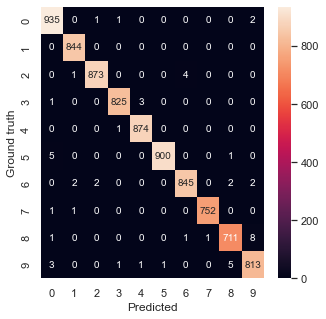

In [52]:
dispConfusionMatrix(y_test, y_pred)

In [53]:
print(classification_report(df_test["class_int"].to_numpy().reshape(-1,),
                           df_test["pred_class"].to_numpy().reshape(-1,)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       939
           1       1.00      1.00      1.00       844
           2       1.00      0.99      1.00       878
           3       1.00      1.00      1.00       829
           4       1.00      1.00      1.00       875
           5       1.00      0.99      1.00       906
           6       0.99      0.99      0.99       853
           7       1.00      1.00      1.00       754
           8       0.99      0.98      0.99       722
           9       0.99      0.99      0.99       824

    accuracy                           0.99      8424
   macro avg       0.99      0.99      0.99      8424
weighted avg       0.99      0.99      0.99      8424



In [54]:
np.where(df_test["class_int"]!=df_test["pred_class"])[0] 
#틀린 것들의 인덱스만 (튜플)

array([ 355,  463,  652,  656,  667, 1012, 1094, 1641, 1949, 2059, 2118,
       2176, 2351, 2485, 2536, 2786, 3168, 3187, 3279, 3530, 3744, 3766,
       3967, 4026, 4151, 4284, 4636, 4846, 4954, 5025, 5187, 5592, 5655,
       5888, 5931, 6265, 6331, 6523, 6545, 6737, 6832, 6841, 6899, 7000,
       7059, 7427, 7444, 7656, 7766, 8040, 8159, 8349], dtype=int64)

In [55]:
indices= np.where(df_test["class_int"]!=df_test["pred_class"])[0] 
df_test.iloc[indices].head(20)

,subject,classname,img,class,pred_class,pred_prob,class_int
1762,p014,c2,d:/Ai/project1/imgs/train/c2/img_69693.jpg,2,6,0.649954,2
17832,p061,c0,d:/Ai/project1/imgs/train/c0/img_27870.jpg,0,9,0.785624,0
19148,p064,c6,d:/Ai/project1/imgs/train/c6/img_79390.jpg,6,1,0.536085,6
16130,p051,c8,d:/Ai/project1/imgs/train/c8/img_7559.jpg,8,9,0.366118,8
17765,p056,c9,d:/Ai/project1/imgs/train/c9/img_67477.jpg,9,0,0.547216,9
12413,p045,c5,d:/Ai/project1/imgs/train/c5/img_42817.jpg,5,0,0.910134,5
12402,p045,c5,d:/Ai/project1/imgs/train/c5/img_82888.jpg,5,0,0.589585,5
9190,p026,c9,d:/Ai/project1/imgs/train/c9/img_10917.jpg,9,8,0.755754,9
2660,p015,c2,d:/Ai/project1/imgs/train/c2/img_8270.jpg,2,6,0.514314,2
1761,p014,c2,d:/Ai/project1/imgs/train/c2/img_86001.jpg,2,1,0.529340,2


In [32]:
df_test.iloc[indices].classname.value_counts()

c8    11
c9    11
c6     8
c5     6
c2     5
c0     4
c3     4
c7     2
c4     1
Name: classname, dtype: int64

In [36]:
df_test[df_test.]

(9,)

In [ ]:
coun=df_test.iloc[indices].classname.value_counts()

영상수:  8424  오답수:  52


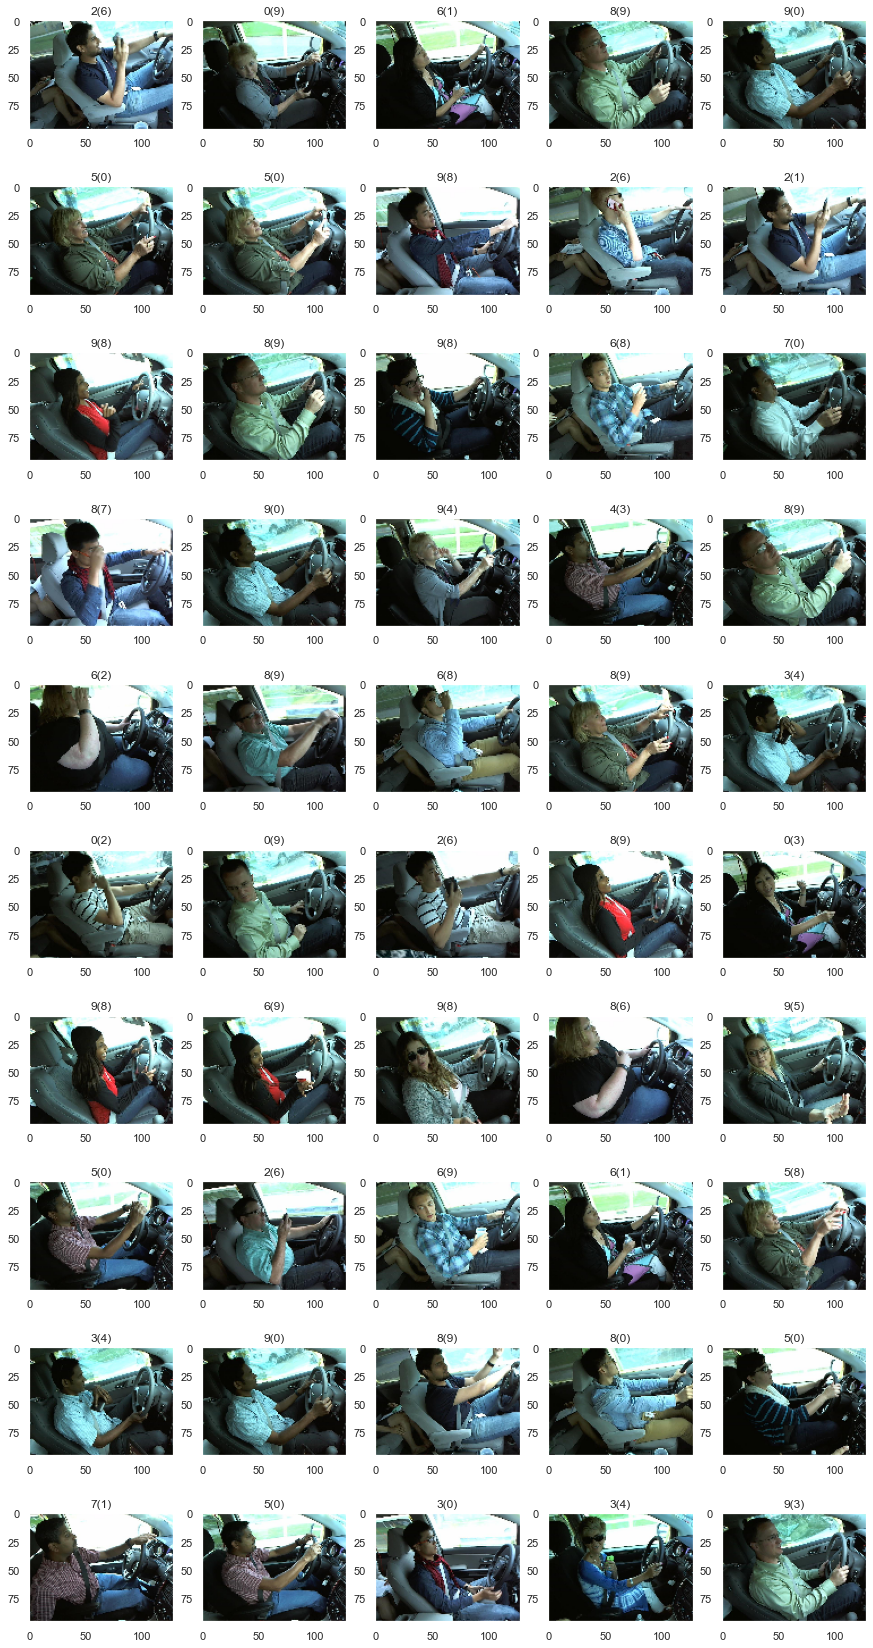

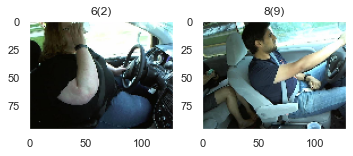

<Figure size 1080x2160 with 0 Axes>

<Figure size 1080x2160 with 0 Axes>

<Figure size 1080x2160 with 0 Axes>

In [56]:
skip=50
print("영상수: ",len(df_test), " 오답수: ", len(indices) )
for k in range(5):
    skip = 50*k
    plt.figure(figsize=(15, 30))
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    for i, idx in enumerate(indices[skip: skip+50]):
        path=df_test.iloc[idx,2]
        plt.subplot(10, 5, i+1)
        view_image = plt.imread(path) 
        view_image = cv2.resize(view_image, (128, 96))
        plt.imshow(view_image)
        plt.xticks=([])
        plt.yticks=([])
        plt.grid(False)
        plt.title(str(df_test.iloc[idx, 3])+ '(' +str(df_test.iloc[idx,4])+')')
    plt.show()